In [ ]:
options(warn=-1)
if(!require(psych)){ install.packages("psych")}
if(!require(FSA)){ install.packages("FSA")}
if(!require(lattice)){ install.packages("lattice")}
if(!require(lsr)){ install.packages("lsr")}
if(!require(rcompanion)){ install.packages("rcompanion")}
if(!require(ggplot2)){ install.packages("ggplot2")}
if(!require(lattice)){ install.packages("tidyr")}
if(!require(lattice)){ install.packages("stringr")}

In [ ]:
library(rcompanion)
library(psych)
library(dplyr)
library(base)
library(ggplot2)
library(tidyr)
library(stringr)
library(car)

## 2. Procesamiento de datos 

In [96]:
line <- readLines("Datos_tarea_2.txt")
Tiempo<-line[which(grepl("user", line, fixed = TRUE))]
params<-line[which(grepl(".sc", line, fixed = TRUE))]

In [97]:
rm("line")

In [98]:
Data_raw <- data.frame(params, Tiempo)

In [99]:
#https://www.tutorialspoint.com/how-to-remove-a-character-in-an-r-data-frame-column
Data_raw$Tiempo <-gsub("user ","",as.character(Data_raw$Tiempo))
Data_raw$Tiempo <-gsub(",",".",as.character(Data_raw$Tiempo))
Data_raw$params <-gsub("APU","_APU_",as.character(Data_raw$params))
Data_raw$params <-gsub("GPU","_GPU_",as.character(Data_raw$params))
Data_raw$params <-gsub("CPU","_CPU_",as.character(Data_raw$params))
Data_raw$params <-gsub("-","_",as.character(Data_raw$params))
Data_raw$params <-gsub(".sc","",as.character(Data_raw$params))

head(Data_raw)

,params,Tiempo
,<chr>,<chr>
1,10167_16000_APU_010_1280x720,50.25
2,10184_1000_APU_011_1440x900,30.90
3,10204_1000_APU_101_1280x720,46.22
4,10210_16000_APU_110_1440x900,171.67
5,10216_4000_APU_001_1280x720,33.40
6,10368_260000_APU_001_1280x720,147.53


In [100]:
Data_proc <- Data_raw %>% separate(params, c(NA,"Objetos","Arquitectura", "Efectos", "Tamaño"), "_")
head(Data_proc)

,Objetos,Arquitectura,Efectos,Tamaño,Tiempo
,<chr>,<chr>,<chr>,<chr>,<chr>
1,16000,APU,010,1280x720,50.25
2,1000,APU,011,1440x900,30.90
3,1000,APU,101,1280x720,46.22
4,16000,APU,110,1440x900,171.67
5,4000,APU,001,1280x720,33.40
6,260000,APU,001,1280x720,147.53


In [101]:
#https://cran.r-project.org/web/packages/hablar/vignettes/convert.html
Data_proc$Tiempo <- as.double(Data_proc$Tiempo)
Data_proc$Objetos <- as.integer(Data_proc$Objetos)
Data_proc$Obj_int <- as.integer(Data_proc$Objetos)
Data_proc$Pixeles <- Data_proc$Tamaño
Data_proc$Pixeles <-gsub("1280x720","2764800",as.character(Data_proc$Pixeles))
Data_proc$Pixeles <-gsub("1440x900","3888000",as.character(Data_proc$Pixeles))
Data_proc$Pixeles <-gsub("1920x1080","6220800",as.character(Data_proc$Pixeles))
Data_proc$Pixeles <- as.integer(Data_proc$Pixeles)
Data_proc$Objetos = factor(Data_proc$Objetos, levels=unique(Data_proc$Objetos))
Data_proc$Tamaño = factor(Data_proc$Tamaño, levels=unique(Data_proc$Tamaño))

head(Data_proc)
str(Data_proc)
summary(Data_proc)

,Objetos,Arquitectura,Efectos,Tamaño,Tiempo,Obj_int,Pixeles
,<fct>,<chr>,<chr>,<fct>,<dbl>,<int>,<int>
1,16000,APU,010,1280x720,50.25,16000,2764800
2,1000,APU,011,1440x900,30.90,1000,3888000
3,1000,APU,101,1280x720,46.22,1000,2764800
4,16000,APU,110,1440x900,171.67,16000,3888000
5,4000,APU,001,1280x720,33.40,4000,2764800
6,260000,APU,001,1280x720,147.53,260000,2764800


'data.frame':	1800 obs. of  7 variables:
 $ Objetos     : Factor w/ 5 levels "16000","1000",..: 1 2 2 1 3 4 4 5 2 3 ...
 $ Arquitectura: chr  "APU" "APU" "APU" "APU" ...
 $ Efectos     : chr  "010" "011" "101" "110" ...
 $ Tamaño      : Factor w/ 3 levels "1280x720","1440x900",..: 1 2 1 2 1 1 2 1 2 3 ...
 $ Tiempo      : num  50.2 30.9 46.2 171.7 33.4 ...
 $ Obj_int     : int  16000 1000 1000 16000 4000 260000 260000 65000 1000 4000 ...
 $ Pixeles     : int  2764800 3888000 2764800 3888000 2764800 2764800 3888000 2764800 3888000 6220800 ...


   Objetos    Arquitectura         Efectos                Tamaño   
 16000 :360   Length:1800        Length:1800        1280x720 :600  
 1000  :360   Class :character   Class :character   1440x900 :600  
 4000  :360   Mode  :character   Mode  :character   1920x1080:600  
 260000:360                                                        
 65000 :360                                                        
                                                                   
     Tiempo           Obj_int          Pixeles       
 Min.   :   0.47   Min.   :  1000   Min.   :2764800  
 1st Qu.:  32.20   1st Qu.:  4000   1st Qu.:2764800  
 Median :  91.87   Median : 16000   Median :3888000  
 Mean   : 396.96   Mean   : 69200   Mean   :4291200  
 3rd Qu.: 342.26   3rd Qu.: 65000   3rd Qu.:6220800  
 Max.   :7588.69   Max.   :260000   Max.   :6220800  

## 3. Análisis del experimento

In [9]:
Summarize(Tiempo ~ Arquitectura*Efectos, data=Data_proc, digits=4)

Arquitectura,Efectos,n,mean,sd,min,Q1,median,Q3,max
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
APU,000,75,48.8199,25.8458,22.15,30.980,37.61,55.795,109.90
CPU,000,75,200.8027,187.0071,36.10,58.190,119.24,271.615,652.17
GPU,000,75,8.6764,11.4868,0.47,1.100,2.81,9.040,34.96
APU,001,75,77.4107,57.6023,23.56,34.205,55.79,103.525,216.40
CPU,001,75,267.5824,254.1440,38.75,68.435,169.75,385.955,875.82
GPU,001,75,17.1929,21.7500,0.60,1.910,7.20,21.850,68.15
APU,010,75,68.9101,42.6068,25.63,35.465,56.13,88.675,168.91
CPU,010,75,289.8768,262.2417,43.06,80.865,202.69,410.945,913.51
GPU,010,75,14.9692,18.2820,0.70,2.060,6.60,17.875,56.69


In [10]:
Summarize(Tiempo ~ Arquitectura*Tamaño, data=Data_proc, digits=4)

Arquitectura,Tamaño,n,mean,sd,min,Q1,median,Q3,max
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
APU,1280x720,200,175.1695,269.9909,22.15,43.7825,78.020,151.7975,1554.30
CPU,1280x720,200,705.7019,985.3063,36.10,148.3150,316.430,795.1450,4808.51
GPU,1280x720,200,49.5922,97.7249,0.47,3.1300,13.015,44.1400,547.68
APU,1440x900,200,216.8042,346.5716,26.24,50.6975,89.975,189.3500,1996.02
CPU,1440x900,200,910.1813,1256.7136,46.22,193.7575,423.250,1027.8500,6160.55
GPU,1440x900,200,61.5909,122.1324,0.51,3.6900,14.520,52.0950,688.60
APU,1920x1080,200,260.8482,426.5577,26.80,55.1875,105.455,233.0900,2437.39
CPU,1920x1080,200,1120.1836,1540.6345,56.81,239.6775,527.385,1274.1375,7588.69
GPU,1920x1080,200,72.5345,145.9630,0.68,4.0200,16.805,62.9325,824.22


In [11]:
Summarize(Tiempo ~ Arquitectura*Objetos, data=Data_proc, digits=4)

Arquitectura,Objetos,n,mean,sd,min,Q1,median,Q3,max
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
APU,16000,120,143.6490,127.0058,34.39,56.0450,95.825,183.4175,521.32
CPU,16000,120,600.9662,494.9332,88.93,193.7575,409.390,890.0100,1869.83
GPU,16000,120,25.2894,26.8955,2.16,6.9225,14.885,33.2275,104.59
APU,1000,120,40.7383,14.5340,22.15,27.8400,34.965,53.3925,70.88
CPU,1000,120,155.7912,110.1541,36.10,52.6175,124.725,253.3375,345.05
GPU,1000,120,2.2397,1.5320,0.47,0.8600,1.695,3.5700,5.37
APU,4000,120,71.3999,42.9259,29.34,38.0075,54.440,95.2200,191.74
CPU,4000,120,299.7444,222.2753,57.86,96.9225,221.765,486.4425,766.32
GPU,4000,120,7.4899,6.4559,1.06,2.3675,4.800,11.2425,28.48


In [12]:
Summarize(Tiempo ~ Tamaño*Objetos, data=Data_proc, digits=4)

Tamaño,Objetos,n,mean,sd,min,Q1,median,Q3,max
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1280x720,16000,120,197.8449,287.4095,2.16,26.8700,78.510,176.7850,1188.33
1440x900,16000,120,257.5177,379.2504,2.67,34.4425,97.435,229.5850,1559.73
1920x1080,16000,120,314.5419,463.5883,3.14,39.9925,111.985,279.7500,1869.83
1280x720,1000,120,54.1805,71.0136,0.47,3.1300,31.870,49.4950,232.66
1440x900,1000,120,66.2853,89.5543,0.51,3.6900,37.170,55.4150,288.09
1920x1080,1000,120,78.3033,108.9232,0.68,4.0200,39.525,65.8775,345.05
1280x720,4000,120,98.8227,134.4504,1.06,9.3775,47.680,88.0250,486.57
1440x900,4000,120,126.7863,178.2801,1.27,11.2175,55.215,111.0950,637.11
1920x1080,4000,120,153.0252,218.0771,1.49,12.7200,62.675,134.2125,766.32


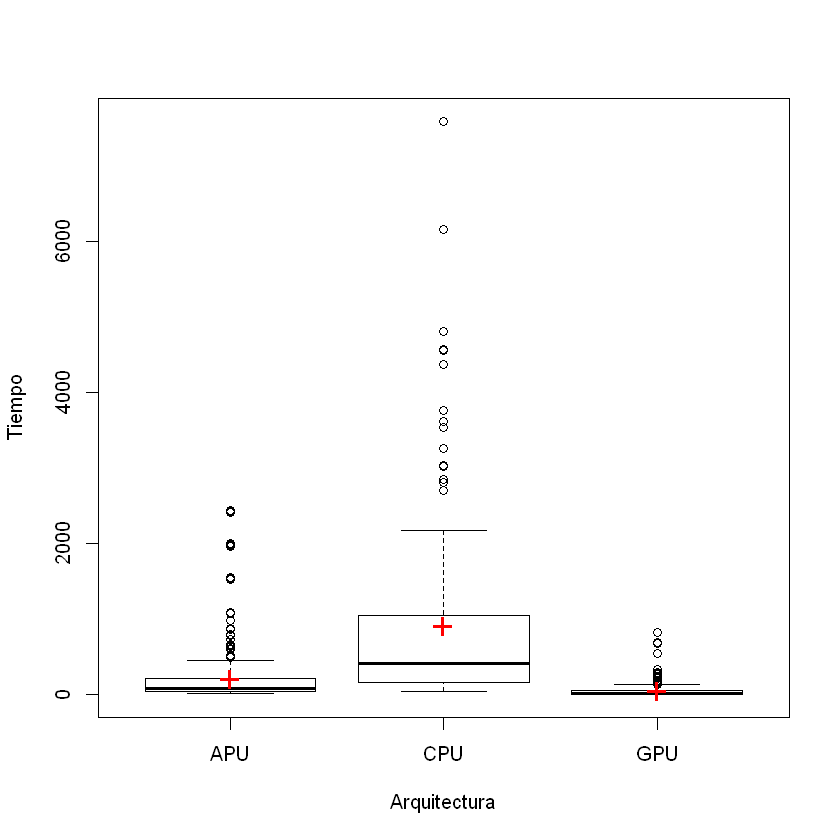

In [13]:
M = tapply(Data_proc$Tiempo, INDEX=Data_proc$Arquitectura, FUN = mean)
boxplot(Tiempo ~ Arquitectura, data = Data_proc)
points(M, col="red", pch="+", cex=2)

#M = tapply(Data_proc$Tiempo, 
#           INDEX= Data_proc$Arquitectura, 
#           FUN = mean)
#boxplot(Tiempo ~ Arquitectura + Efectos, 
#        data = Data_proc)
#points(M, 
#       col="red",
#       pch="+", cex=2)

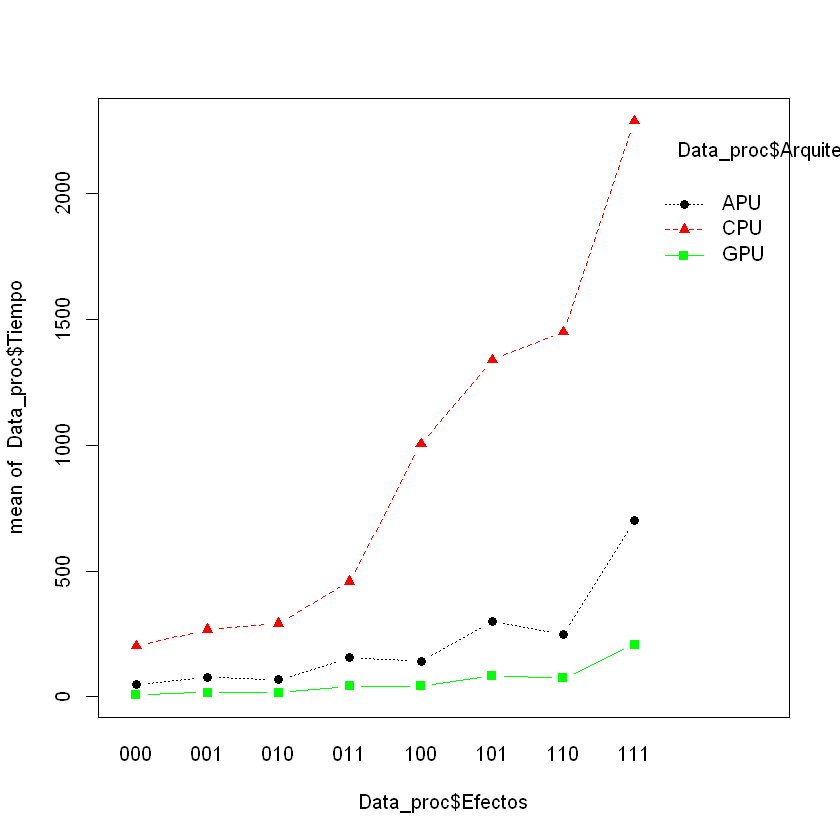

In [14]:
interaction.plot(x.factor = Data_proc$Efectos,
                 trace.factor = Data_proc$Arquitectura,
                 response = Data_proc$Tiempo,
                 fun = mean,
                 type = "b",
                 col = c("black", "red", "green"),
                 pch = c(19, 17, 15),
                 fixed = TRUE,
                 leg_bty = "o")

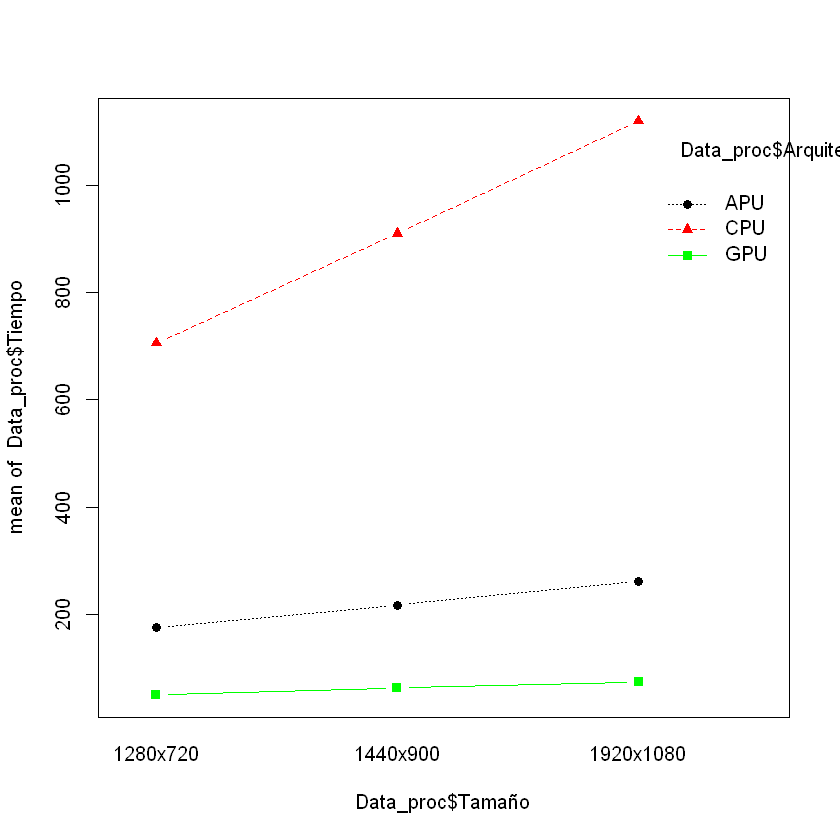

In [15]:
interaction.plot(x.factor = Data_proc$Tamaño,
                 trace.factor = Data_proc$Arquitectura,
                 response = Data_proc$Tiempo,
                 fun = mean,
                 type = "b",
                 col = c("black", "red", "green"),
                 pch = c(19, 17, 15),
                 fixed = TRUE,
                 leg_bty = "o")

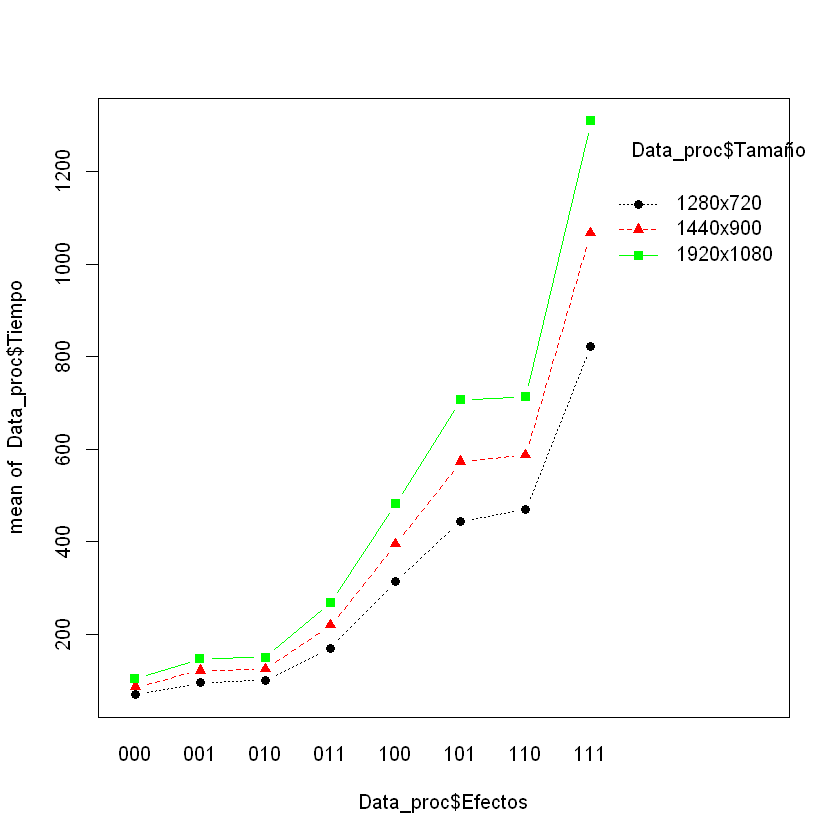

In [16]:
interaction.plot(x.factor = Data_proc$Efectos,
                 trace.factor = Data_proc$Tamaño,
                 response = Data_proc$Tiempo,
                 fun = mean,
                 type = "b",
                 col = c("black", "red", "green"),
                 pch = c(19, 17, 15),
                 fixed = TRUE,
                 leg_bty = "o")

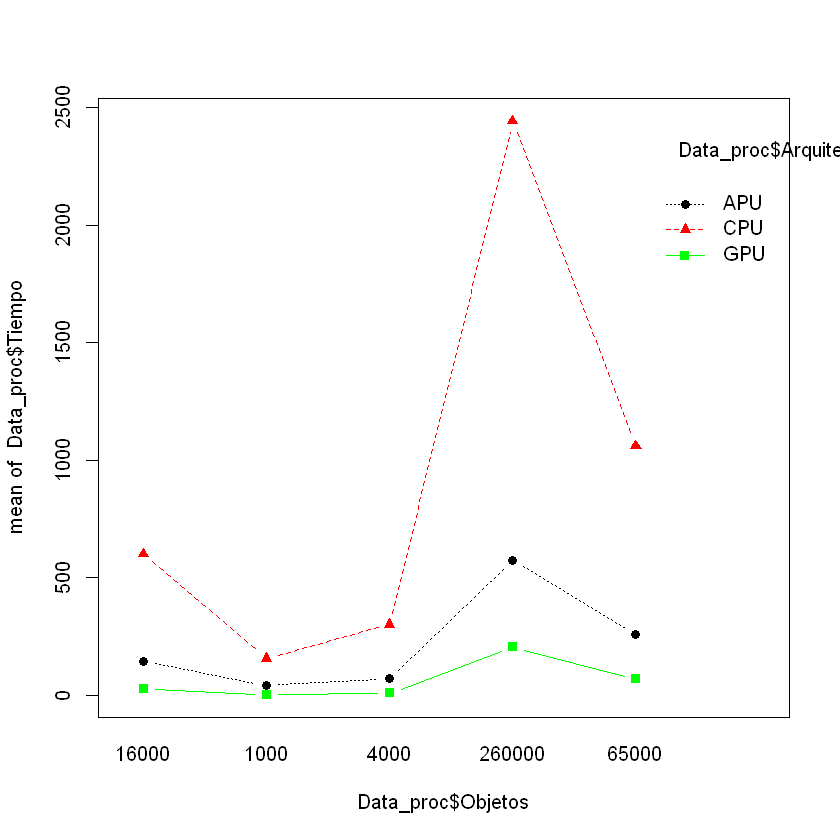

In [17]:
interaction.plot(x.factor = Data_proc$Objetos,
                 trace.factor = Data_proc$Arquitectura,
                 response = Data_proc$Tiempo,
                 fun = mean,
                 type = "b",
                 col = c("black", "red", "green"),
                 pch = c(19, 17, 15),
                 fixed = TRUE,
                 leg_bty = "o")

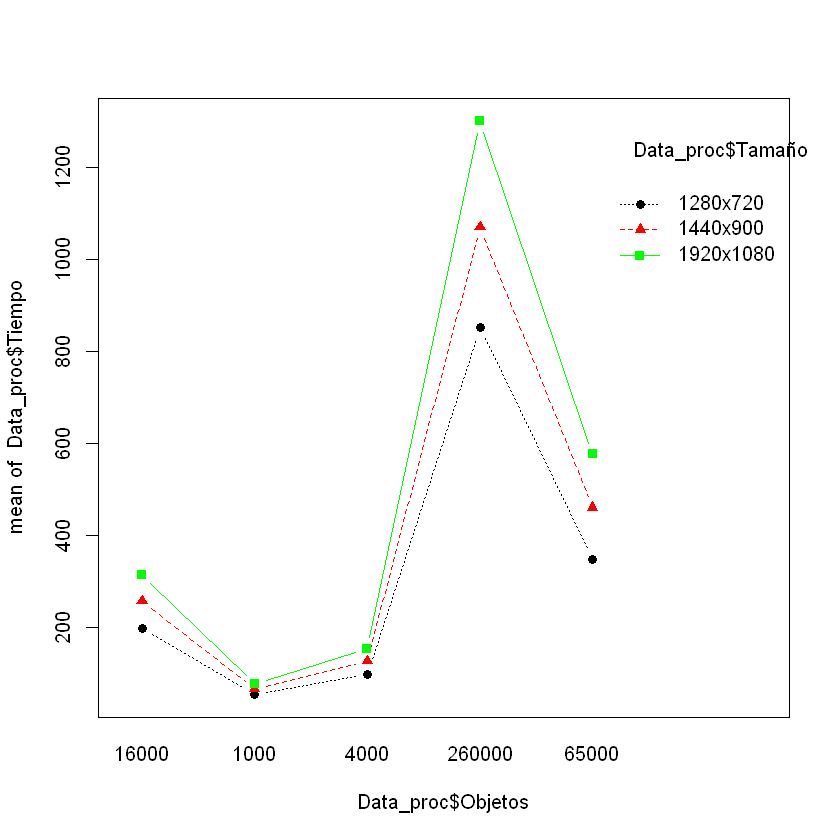

In [18]:
interaction.plot(x.factor = Data_proc$Objetos,
                 trace.factor = Data_proc$Tamaño,
                 response = Data_proc$Tiempo,
                 fun = mean,
                 type = "b",
                 col = c("black", "red", "green"),
                 pch = c(19, 17, 15),
                 fixed = TRUE,
                 leg_bty = "o")

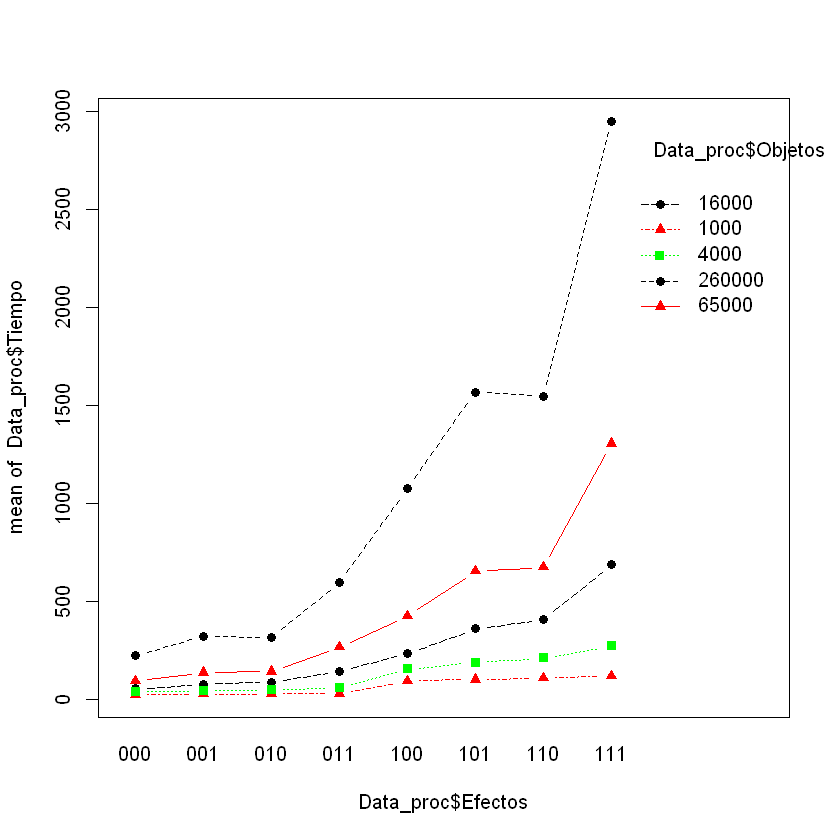

In [19]:
interaction.plot(x.factor = Data_proc$Efectos,
                 trace.factor = Data_proc$Objetos,
                 response = Data_proc$Tiempo,
                 fun = mean,
                 type = "b",
                 col = c("black", "red", "green"),
                 pch = c(19, 17, 15),
                 fixed = TRUE,
                 leg_bty = "o")

## 4. Análisis de los supuestos del ANOVA y transformación de datos

In [20]:
model = lm(Tiempo ~ Arquitectura*Efectos*Objetos*Tamaño, data = Data_proc)
Anova(model, type = "II")

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Arquitectura,2.460990e+08,2,38754226.74,0
Efectos,1.788590e+08,7,8047334.79,0
Objetos,2.394779e+08,4,18855786.88,0
Tamaño,9.121745e+06,2,1436438.93,0
Arquitectura:Efectos,1.391115e+08,14,3129494.69,0
Arquitectura:Objetos,1.955549e+08,8,7698710.09,0
Efectos:Objetos,1.656942e+08,28,1863753.49,0
Arquitectura:Tamaño,8.845734e+06,4,696487.17,0
Efectos:Tamaño,6.209094e+06,14,139681.67,0


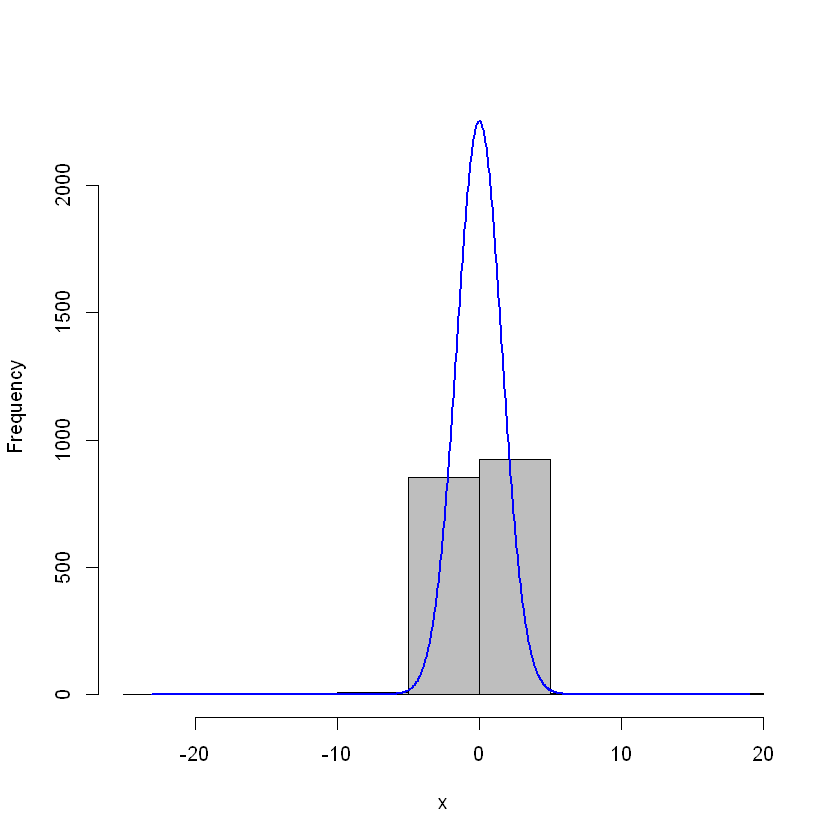

In [21]:
x=residuals(model)
plotNormalHistogram(x)

ERROR: Error in (dm - 1) %*% ff: argumentos no compatibles


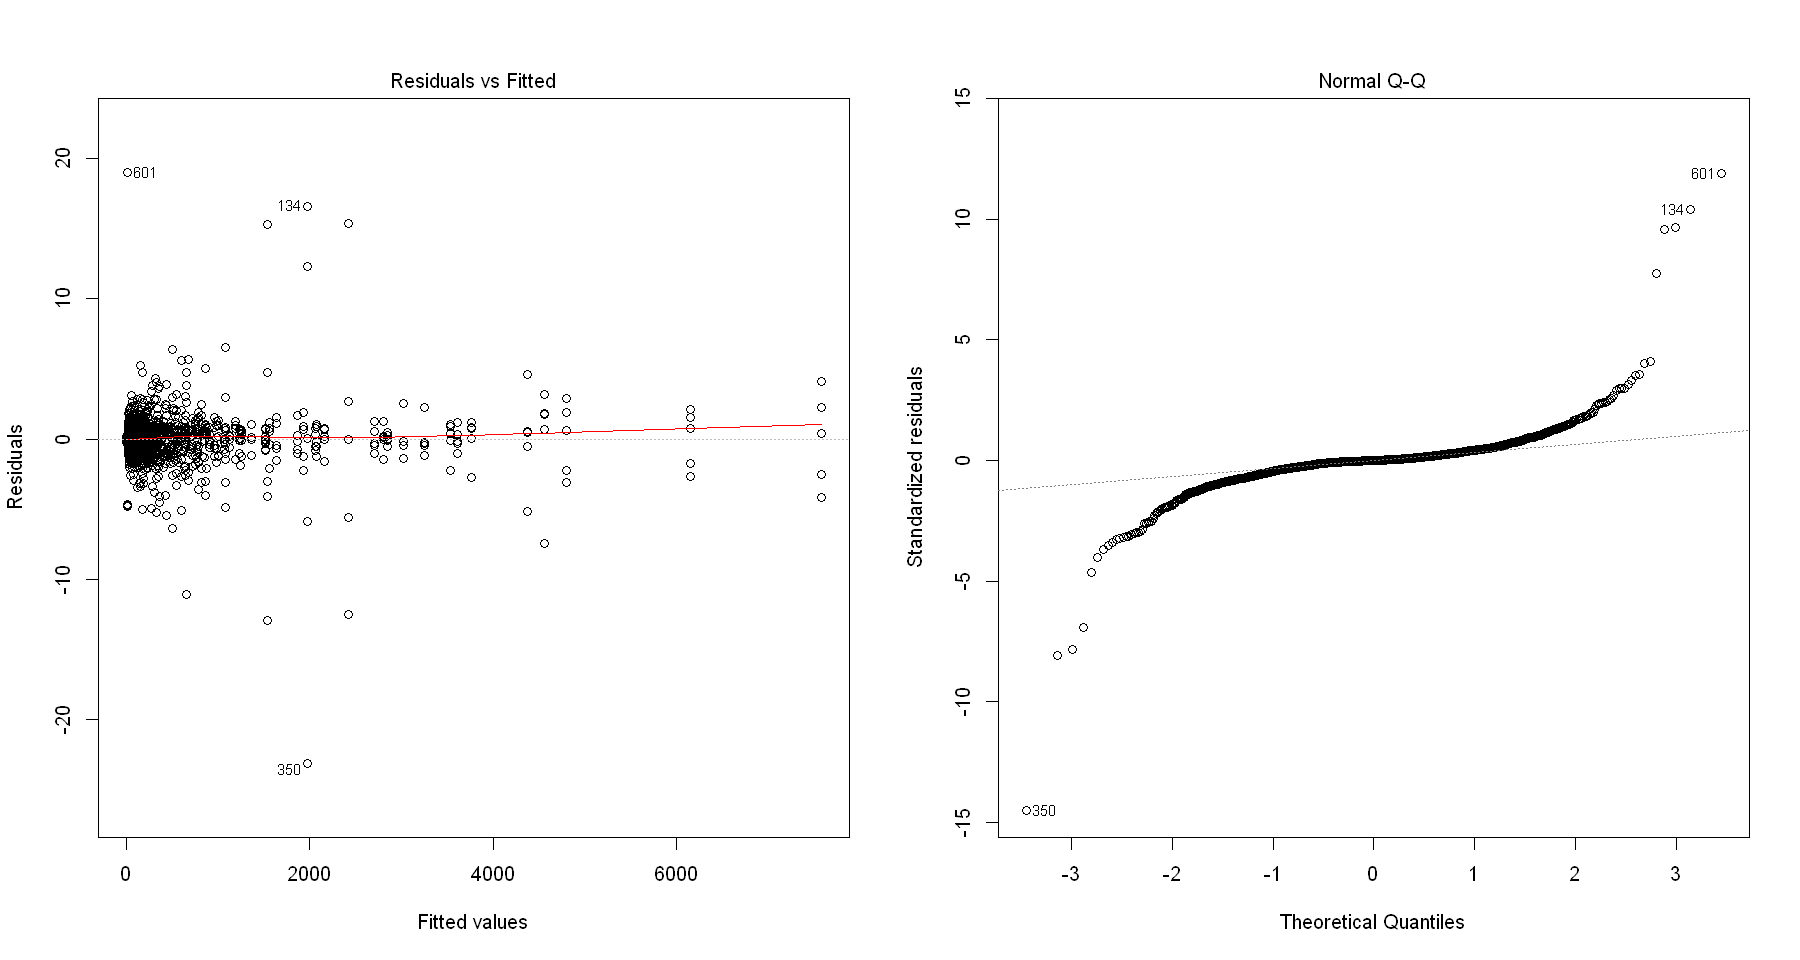

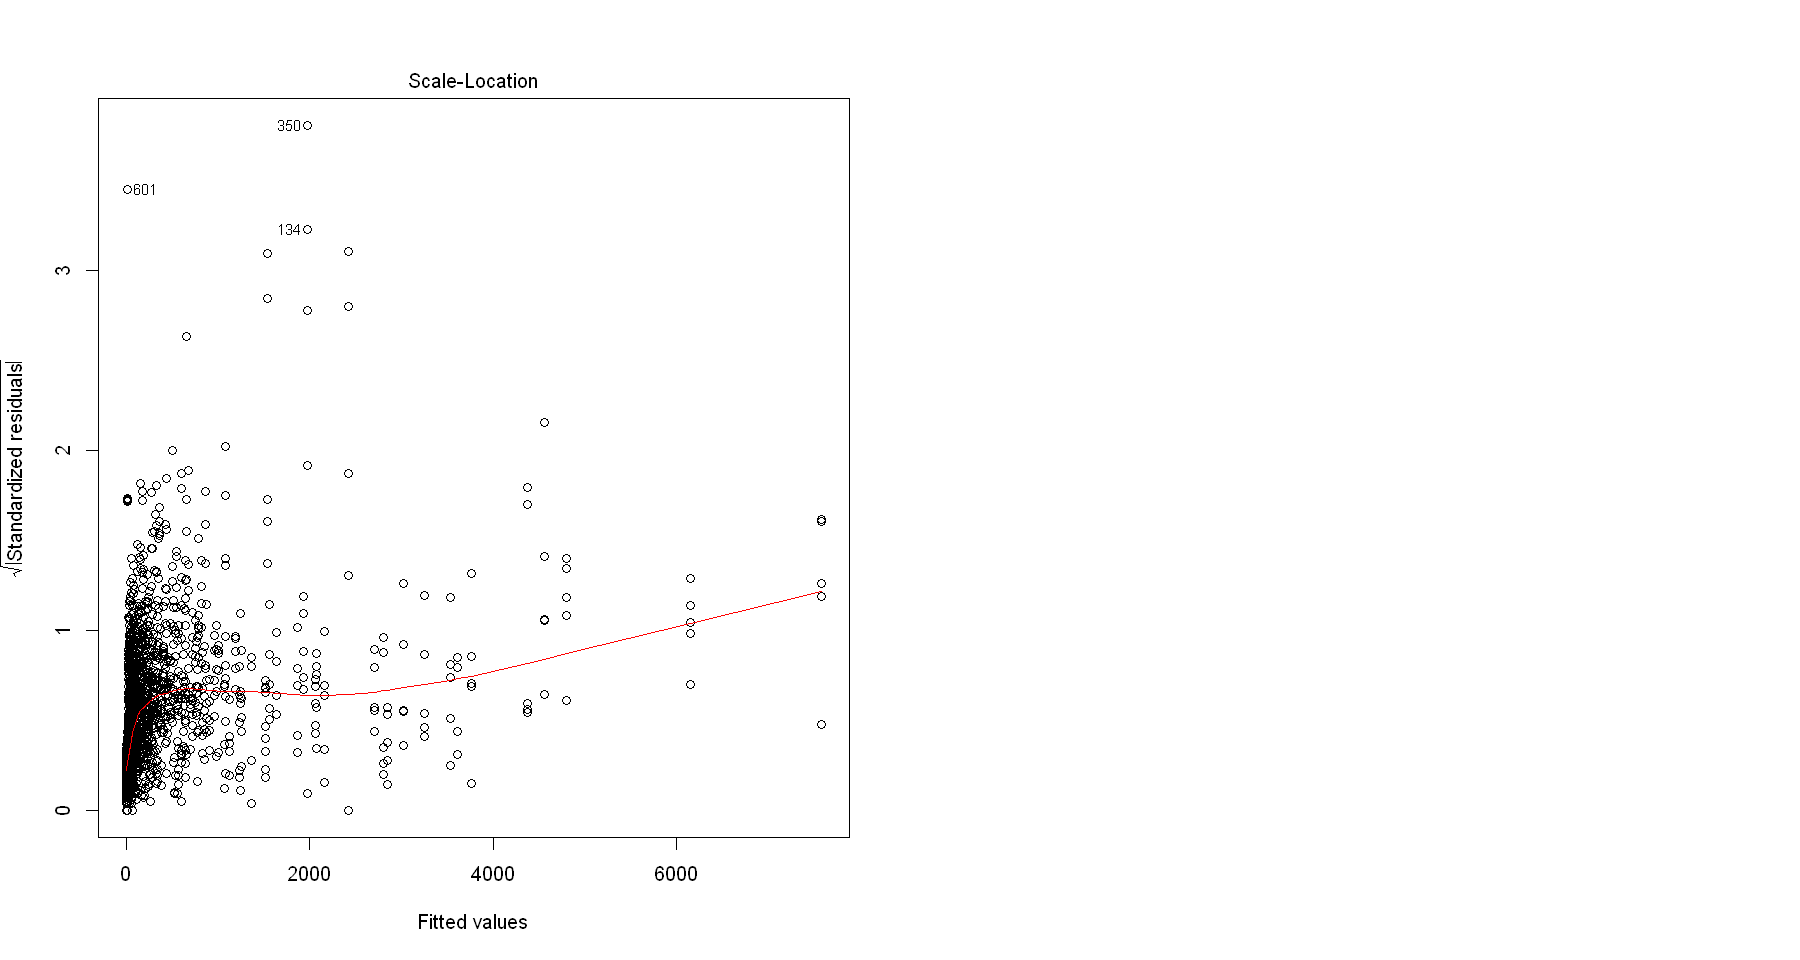

In [22]:
options(repr.plot.width=15, repr.plot.height=8)
par(mfrow=c(1,2))
plot(model)

## Transformación de datos por raíz cuadrada

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Arquitectura,116736.18691,2,7.600349e+06,0
Efectos,63299.78825,7,1.177504e+06,0
Objetos,91091.55595,4,2.965352e+06,0
Tamaño,2712.09285,2,1.765764e+05,0
Arquitectura:Efectos,19993.42925,14,1.859590e+05,0
Arquitectura:Objetos,21162.24516,8,3.444529e+05,0
Efectos:Objetos,22418.50082,28,1.042573e+05,0
Arquitectura:Tamaño,1261.78724,4,4.107563e+04,0
Efectos:Tamaño,575.13903,14,5.349373e+03,0


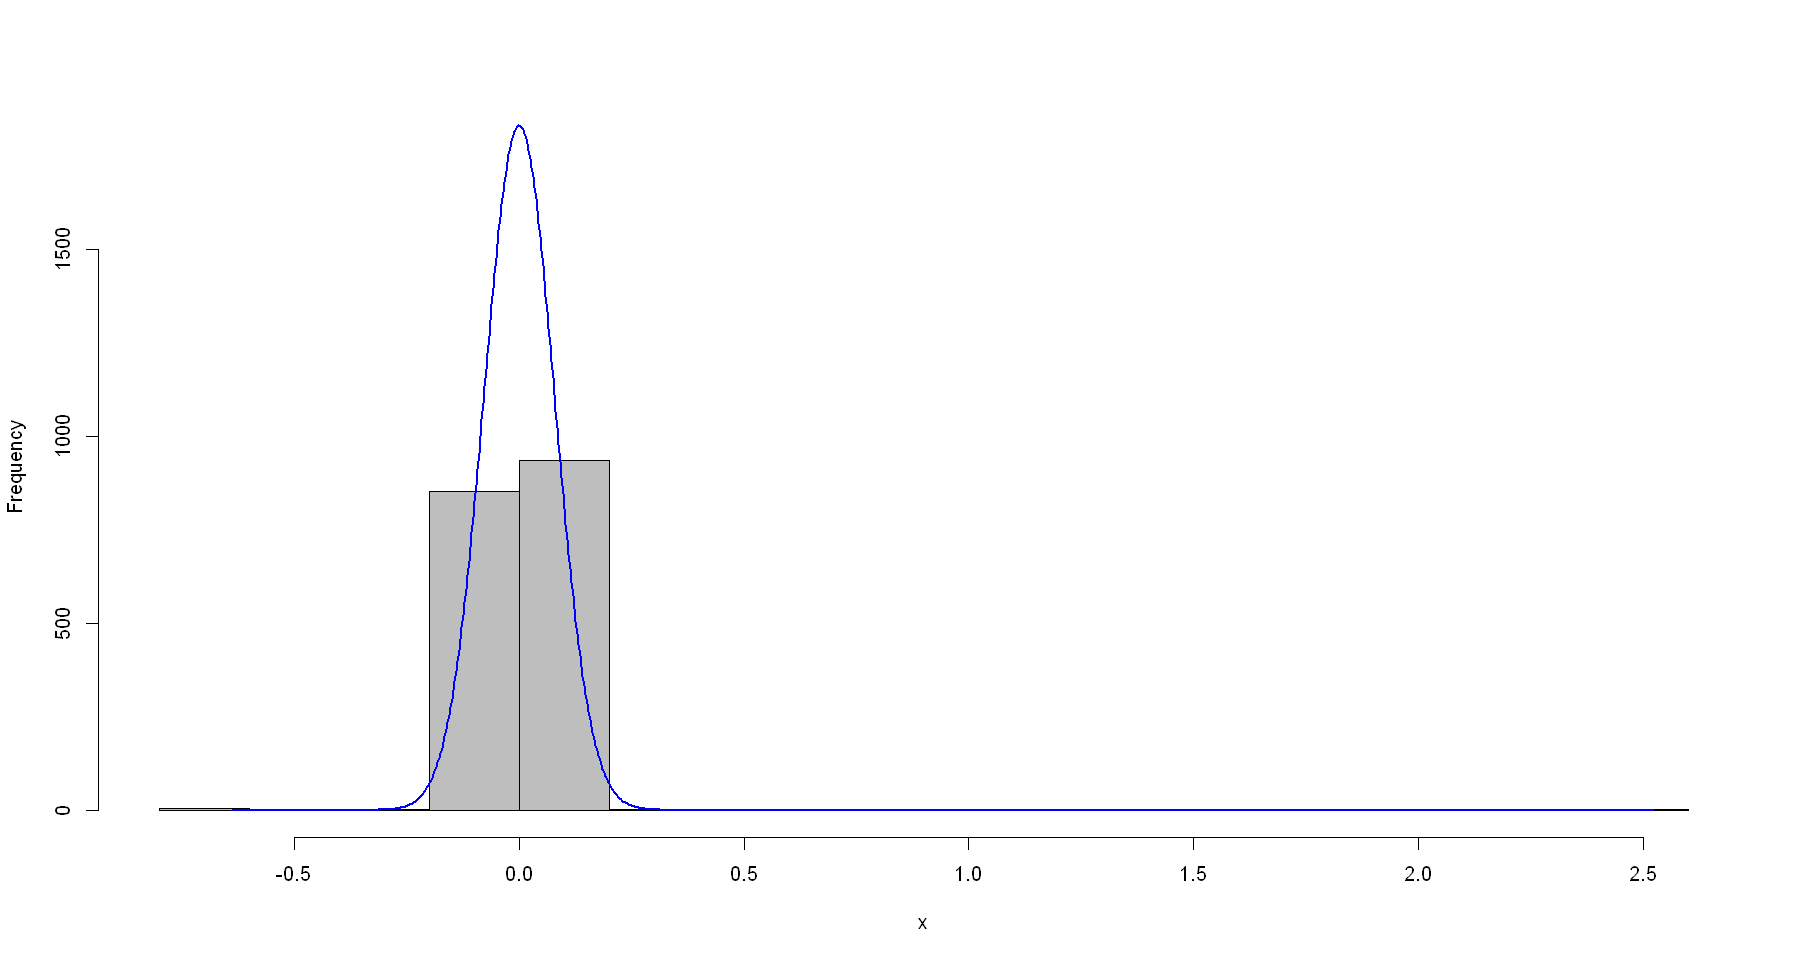

In [23]:
Tiempo_sqrt=sqrt(Data_proc$Tiempo)
model = lm(Tiempo_sqrt ~ Arquitectura*Efectos*Objetos*Tamaño, data = Data_proc)
Anova(model, type = "II")
x=residuals(model)
plotNormalHistogram(x)


ERROR: Error in (dm - 1) %*% ff: argumentos no compatibles


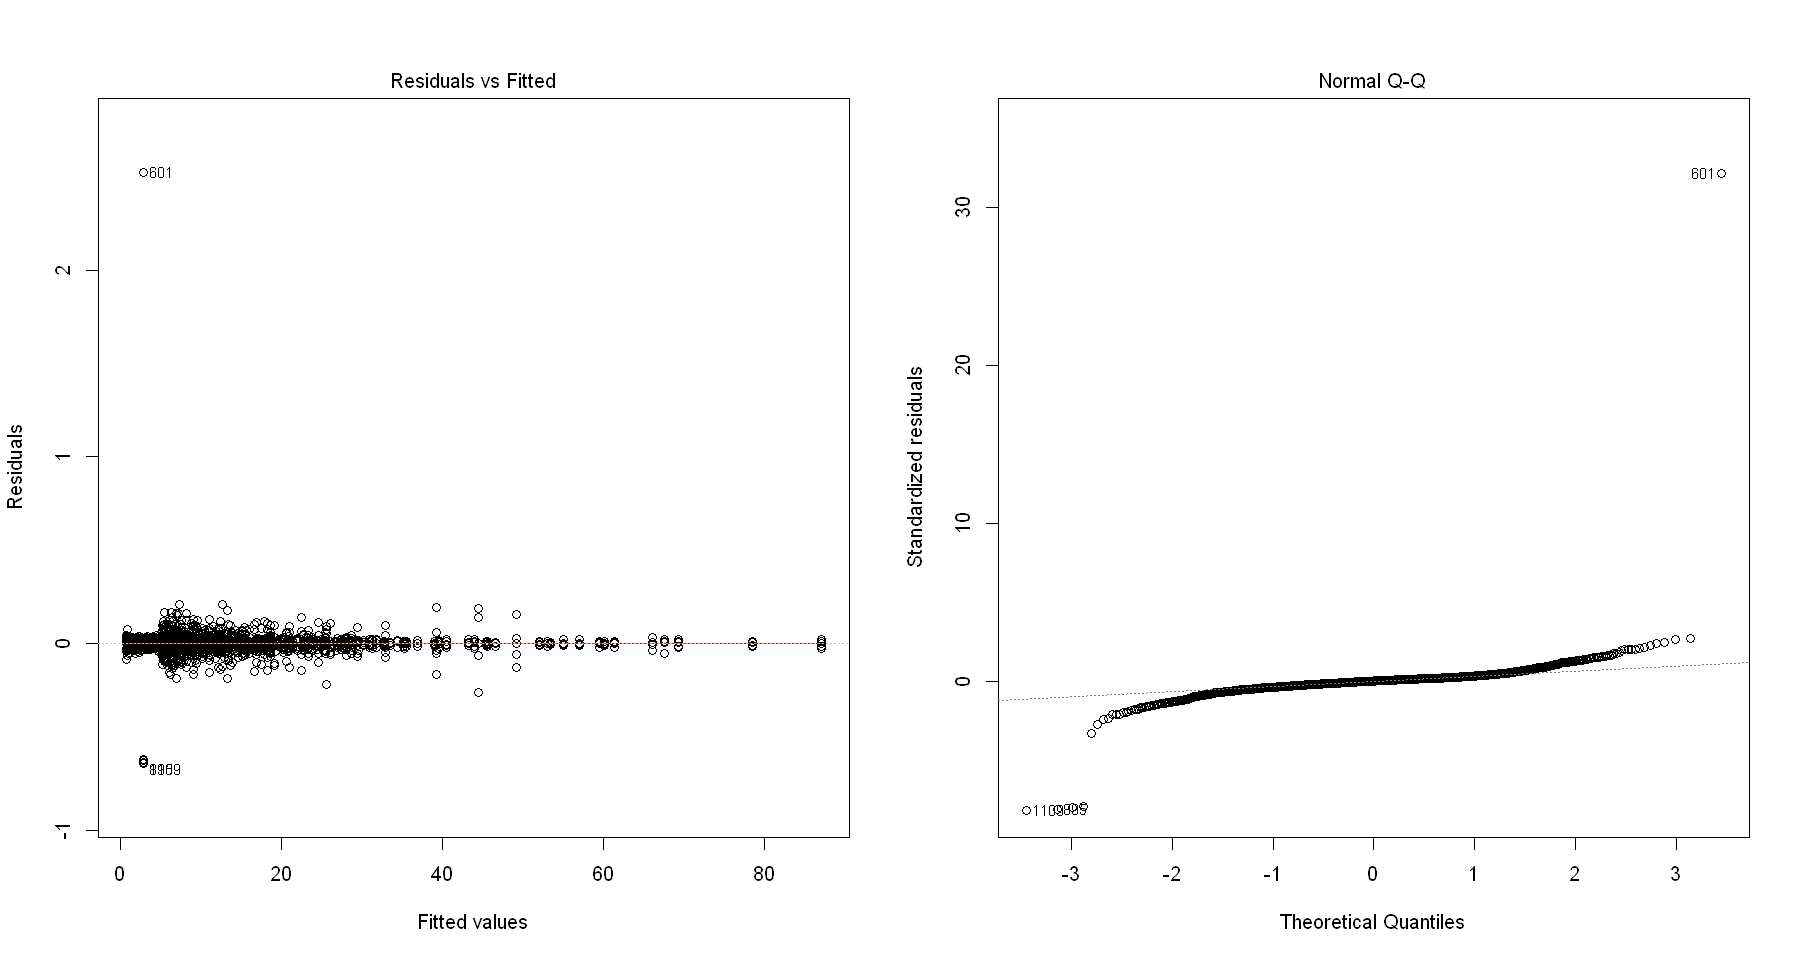

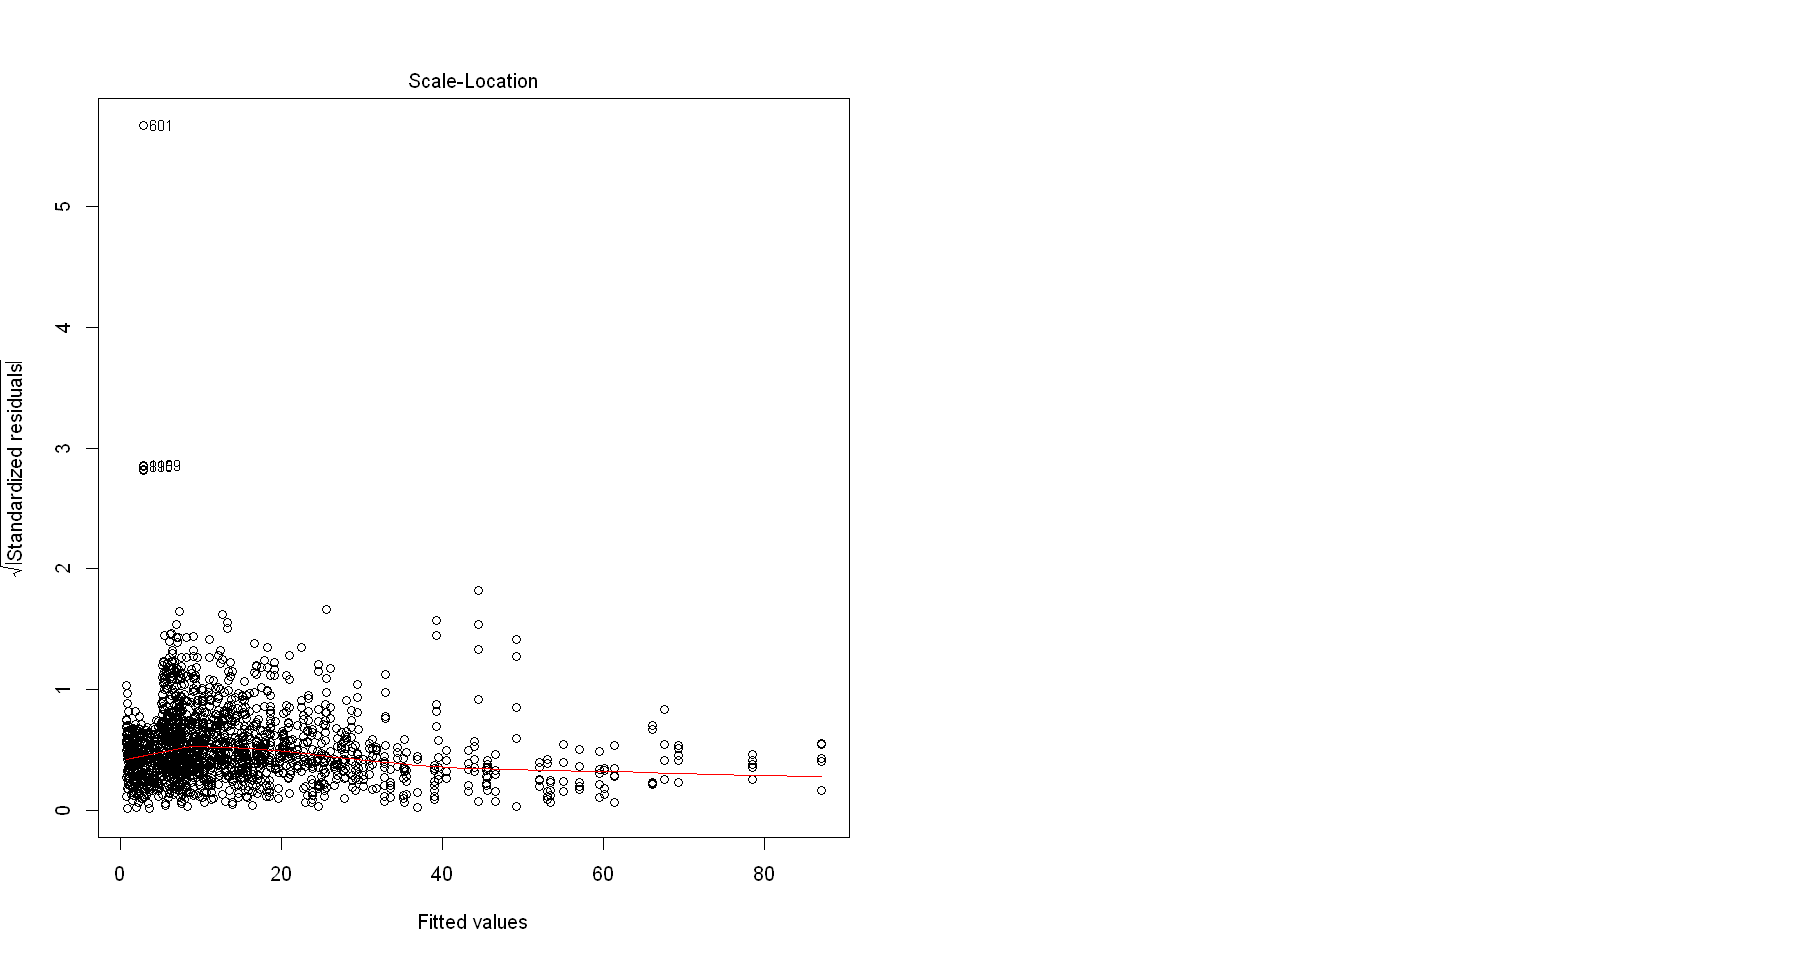

In [24]:
options(repr.plot.width=15, repr.plot.height=8)
par(mfrow=c(1,2))
plot(model)

## Transformación de datos por logaritmo

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Arquitectura,3411.3049552,2,8.048703e+05,0.000000e+00
Efectos,1160.1873557,7,7.821057e+04,0.000000e+00
Objetos,2103.8305240,4,2.481910e+05,0.000000e+00
Tamaño,41.5346230,2,9.799764e+03,0.000000e+00
Arquitectura:Efectos,45.2082539,14,1.523790e+03,0.000000e+00
Arquitectura:Objetos,177.3873804,8,1.046329e+04,0.000000e+00
Efectos:Objetos,47.6326639,28,8.027534e+02,0.000000e+00
Arquitectura:Tamaño,1.5779068,4,1.861473e+02,1.165229e-128
Efectos:Tamaño,0.4131410,14,1.392533e+01,1.207761e-31


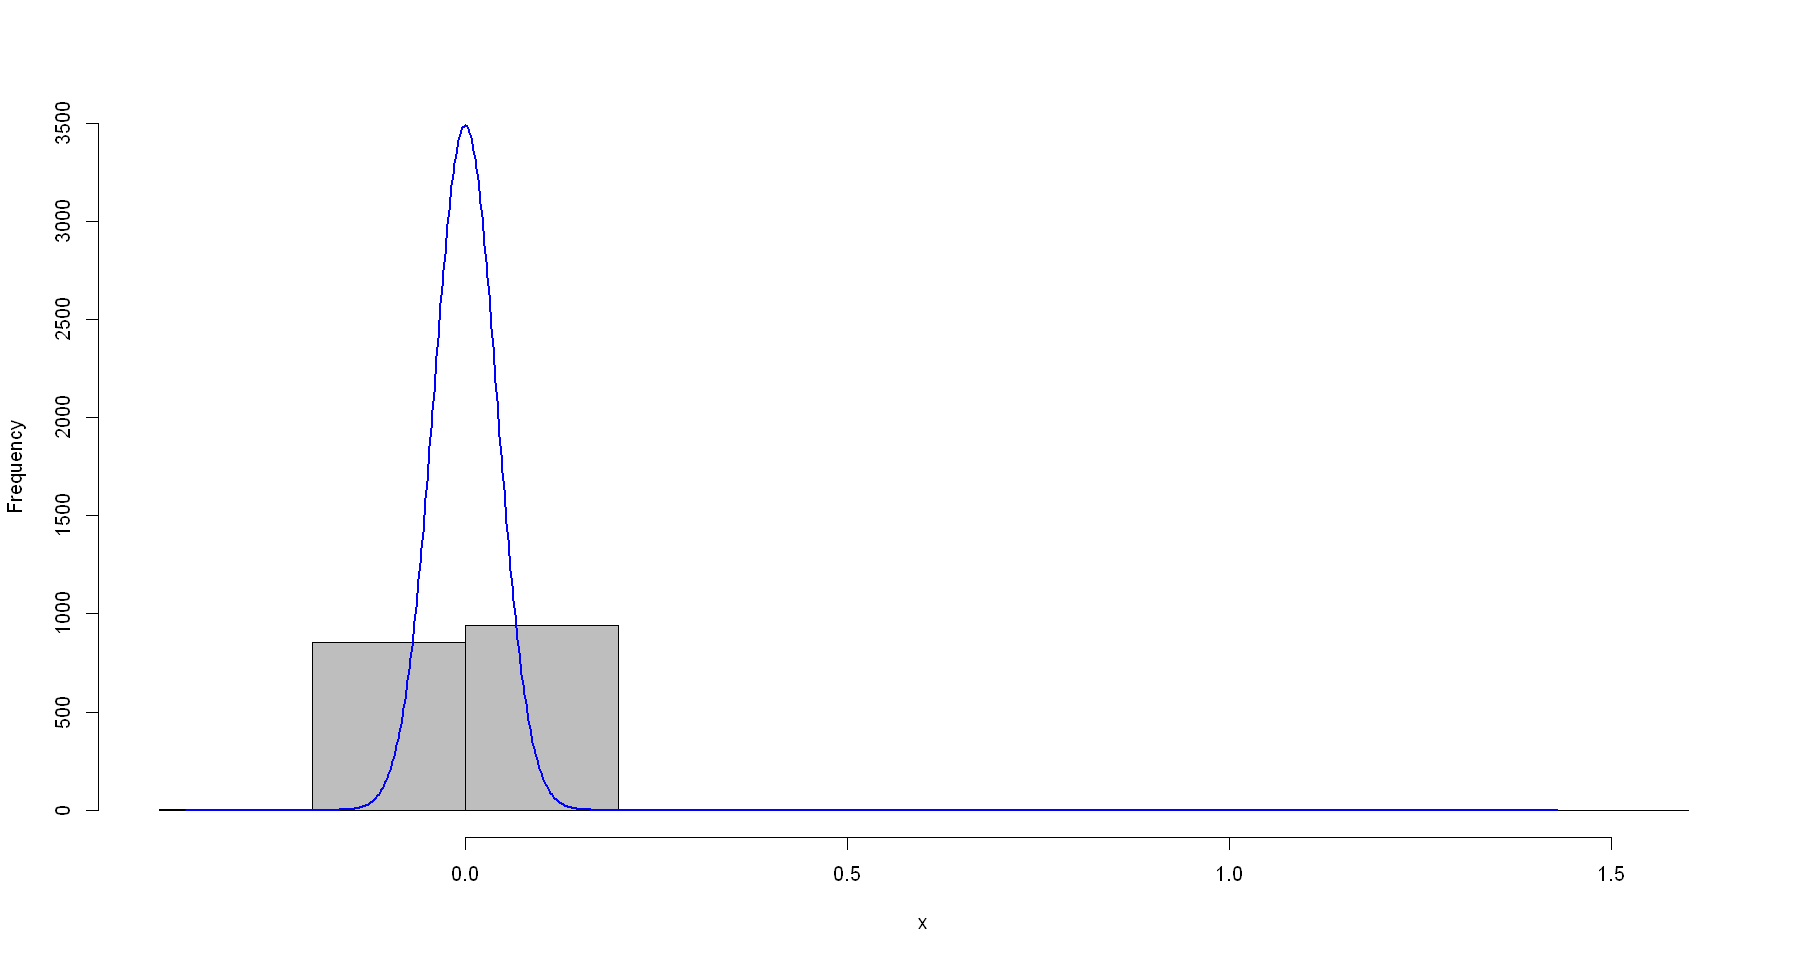

In [27]:
Tiempo_log=log(Data_proc$Tiempo)
model = lm(Tiempo_log ~ Arquitectura*Efectos*Objetos*Tamaño, data = Data_proc)
Anova(model, type = "II")
x=residuals(model)
plotNormalHistogram(x)


ERROR: Error in (dm - 1) %*% ff: argumentos no compatibles


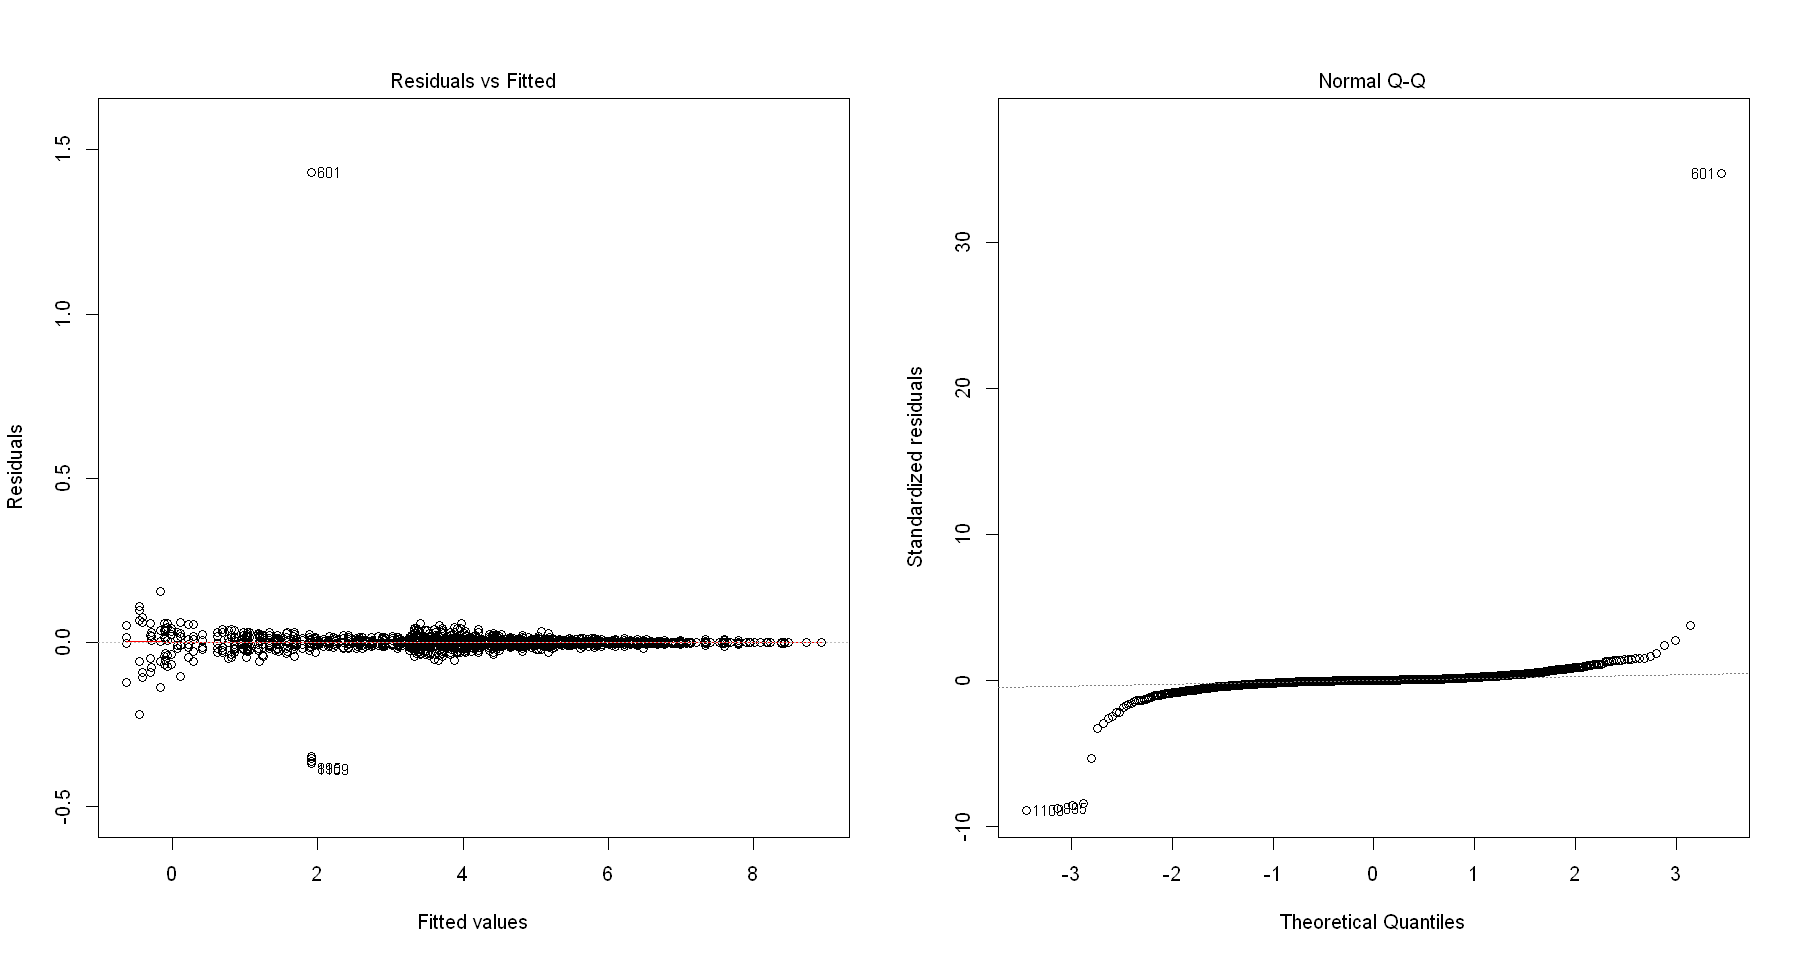

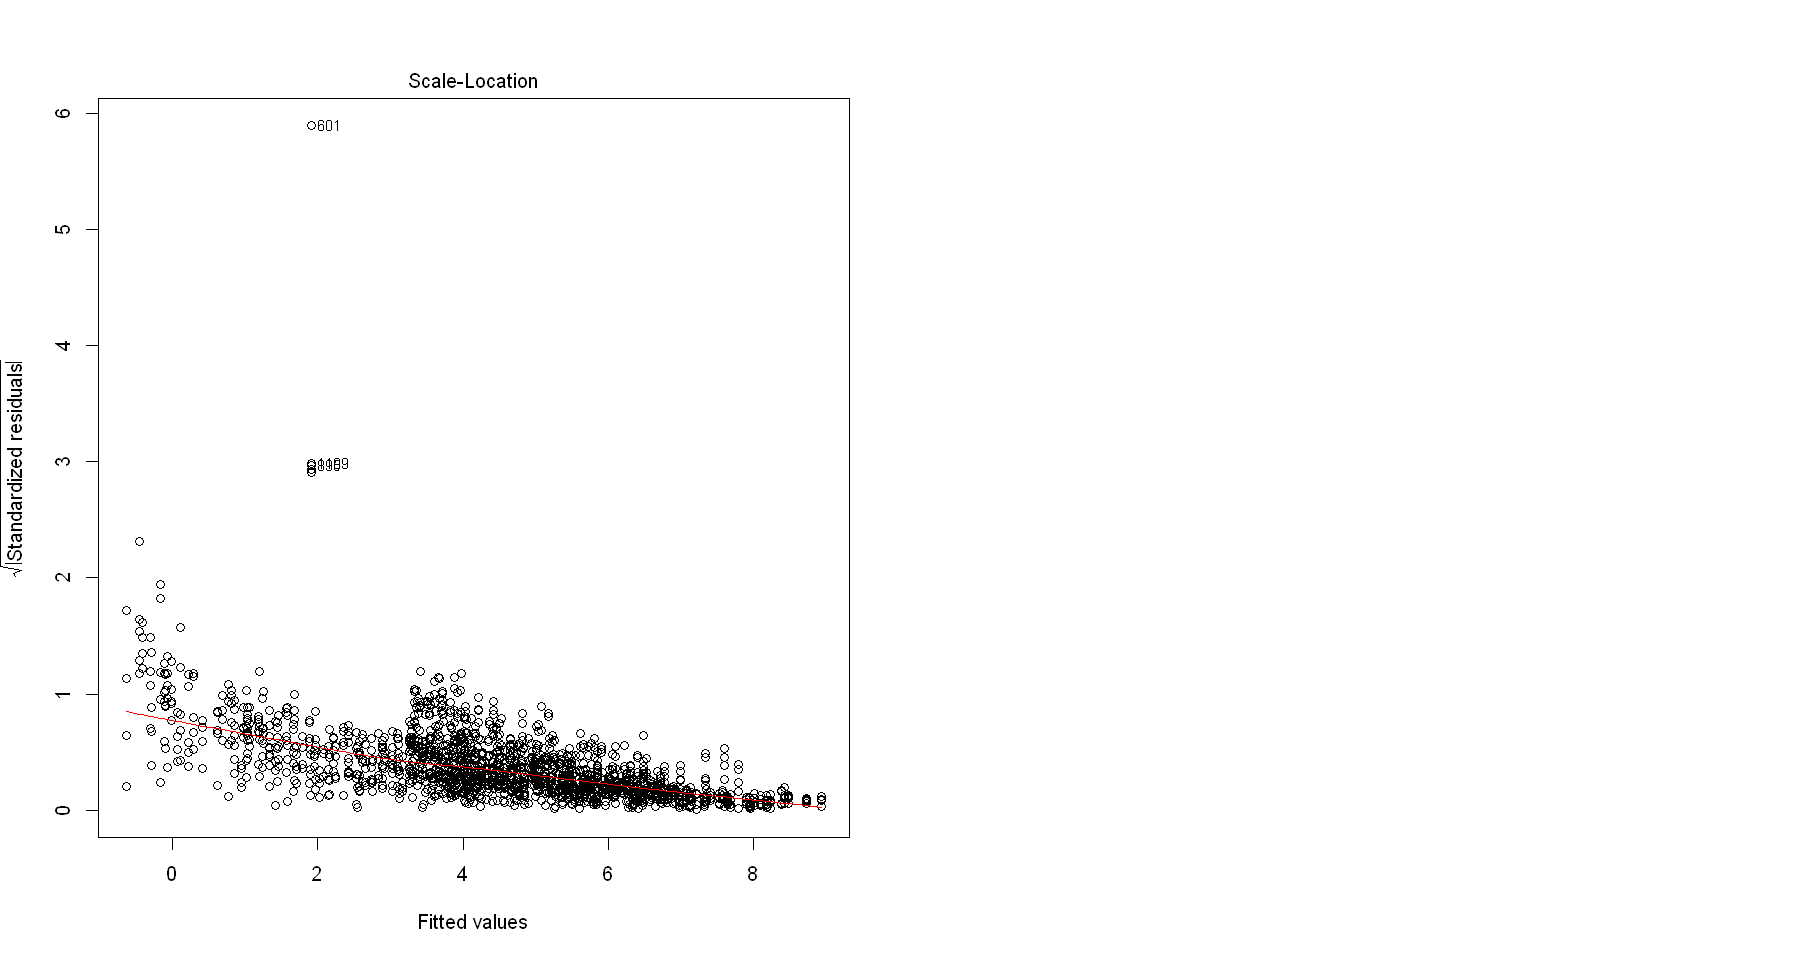

In [28]:
options(repr.plot.width=15, repr.plot.height=8)
par(mfrow=c(1,2))
plot(model)

In [29]:
leveneTest(Tiempo_log ~ Arquitectura*Efectos*Objetos*Tamaño, data = Data_proc)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,359,1.186417,0.01787367
,1440,NA,NA


## 5. Análisis de ANOVA en R (con transformación usando Tukey's ladder of powers)


    lambda      W Shapiro.p.value
404  0.075 0.9921       2.718e-08

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 



,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Arquitectura,35.975018214,2,1.064903e+06,0.000000e+00
Efectos,13.225774417,7,1.118567e+05,0.000000e+00
Objetos,22.927223330,4,3.393364e+05,0.000000e+00
Tamaño,0.487080646,2,1.441816e+04,0.000000e+00
Arquitectura:Efectos,0.521904061,14,2.206996e+03,0.000000e+00
Arquitectura:Objetos,0.899047223,8,6.653213e+03,0.000000e+00
Efectos:Objetos,0.853525446,28,1.804668e+03,0.000000e+00
Arquitectura:Tamaño,0.036250774,4,5.365327e+02,2.116132e-283
Efectos:Tamaño,0.008937546,14,3.779455e+01,1.069900e-87


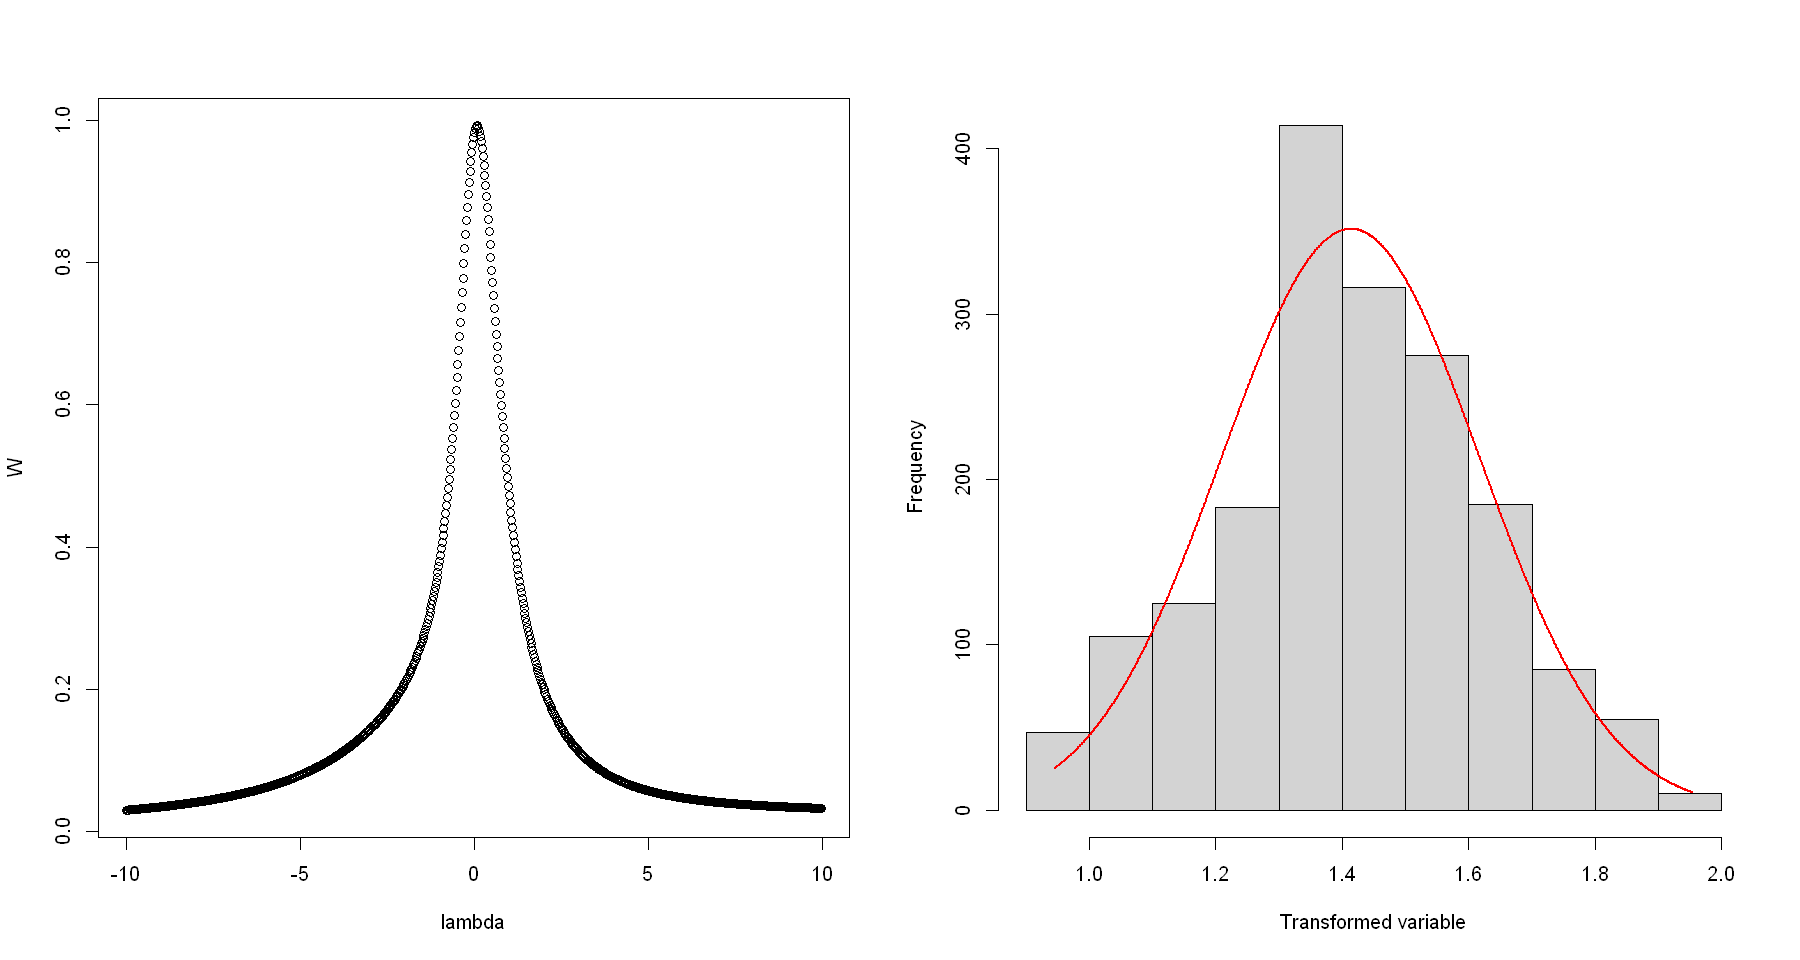

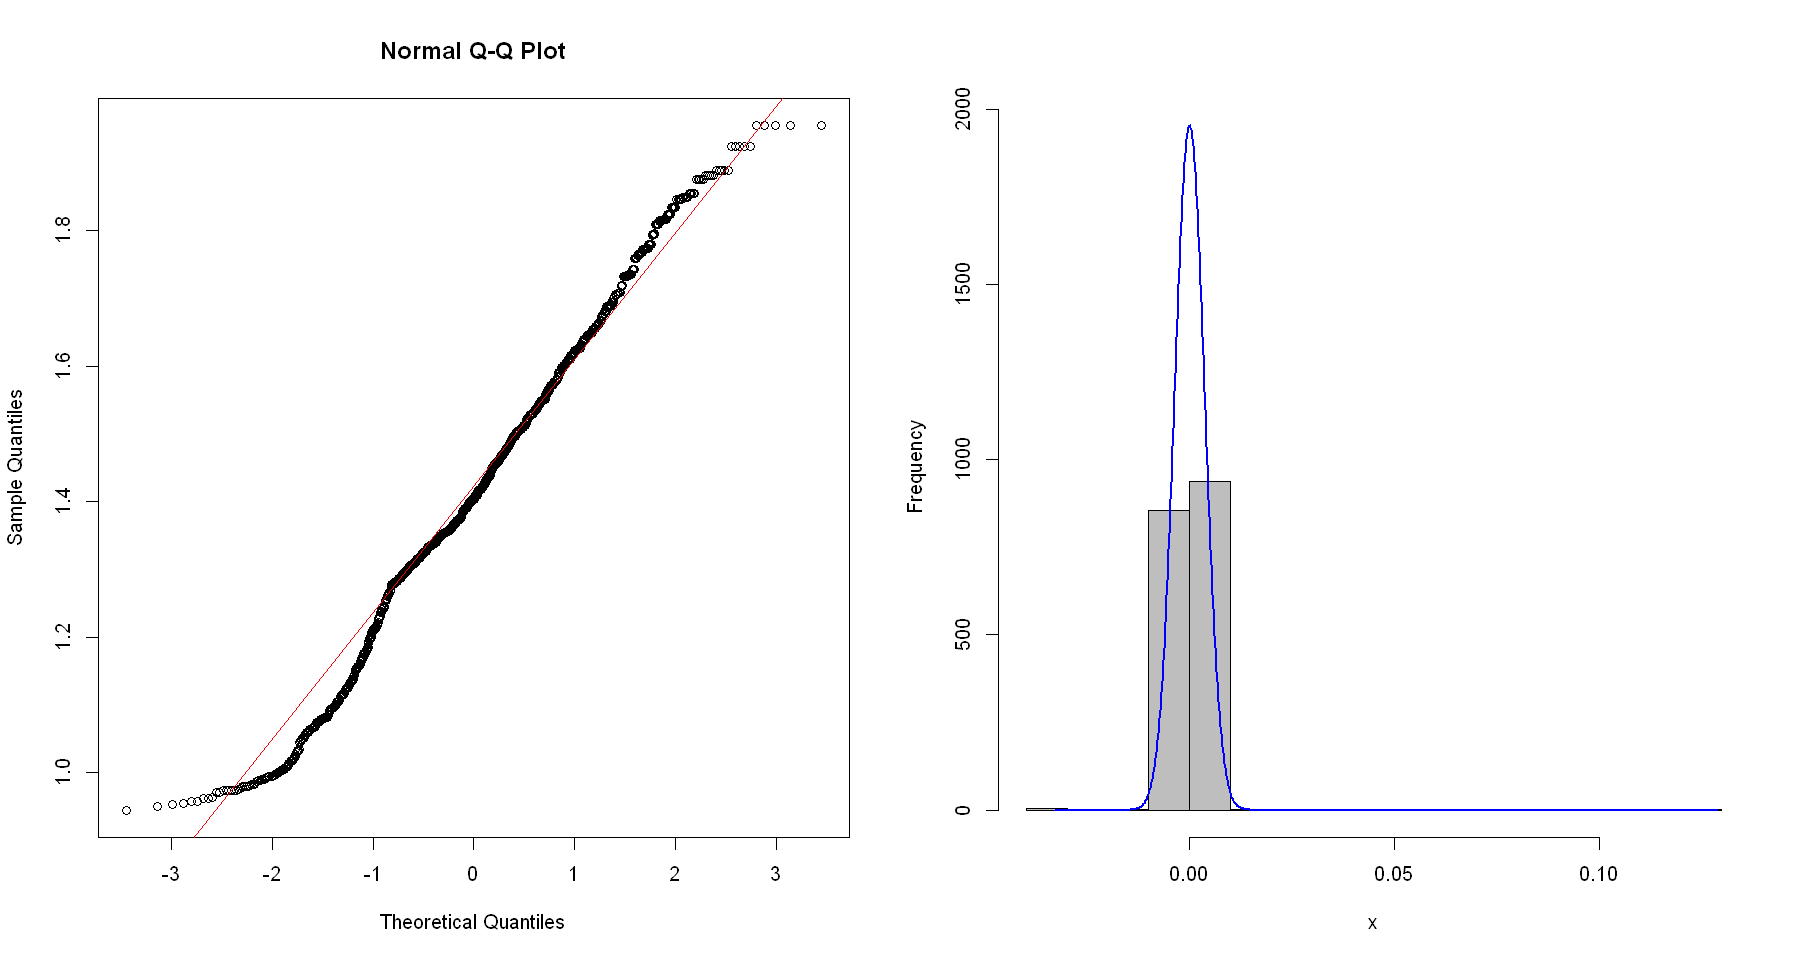

In [30]:
options(repr.plot.width=15, repr.plot.height=8)
par(mfrow=c(1,2))
Tiempo_tukg=transformTukey(Data_proc$Tiempo)
model = lm(Tiempo_tukg ~ Arquitectura*Efectos*Objetos*Tamaño, data = Data_proc)
Anova(model, type = "II")
x=residuals(model)
plotNormalHistogram(x)

## Prueba de Levene para homocedasticidad

In [31]:
leveneTest(Tiempo_tukg ~ Arquitectura*Efectos*Objetos*Tamaño, data = Data_proc)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,359,1.13057,0.0661341
,1440,NA,NA


## Diagramas de interacción con tiempo transformado

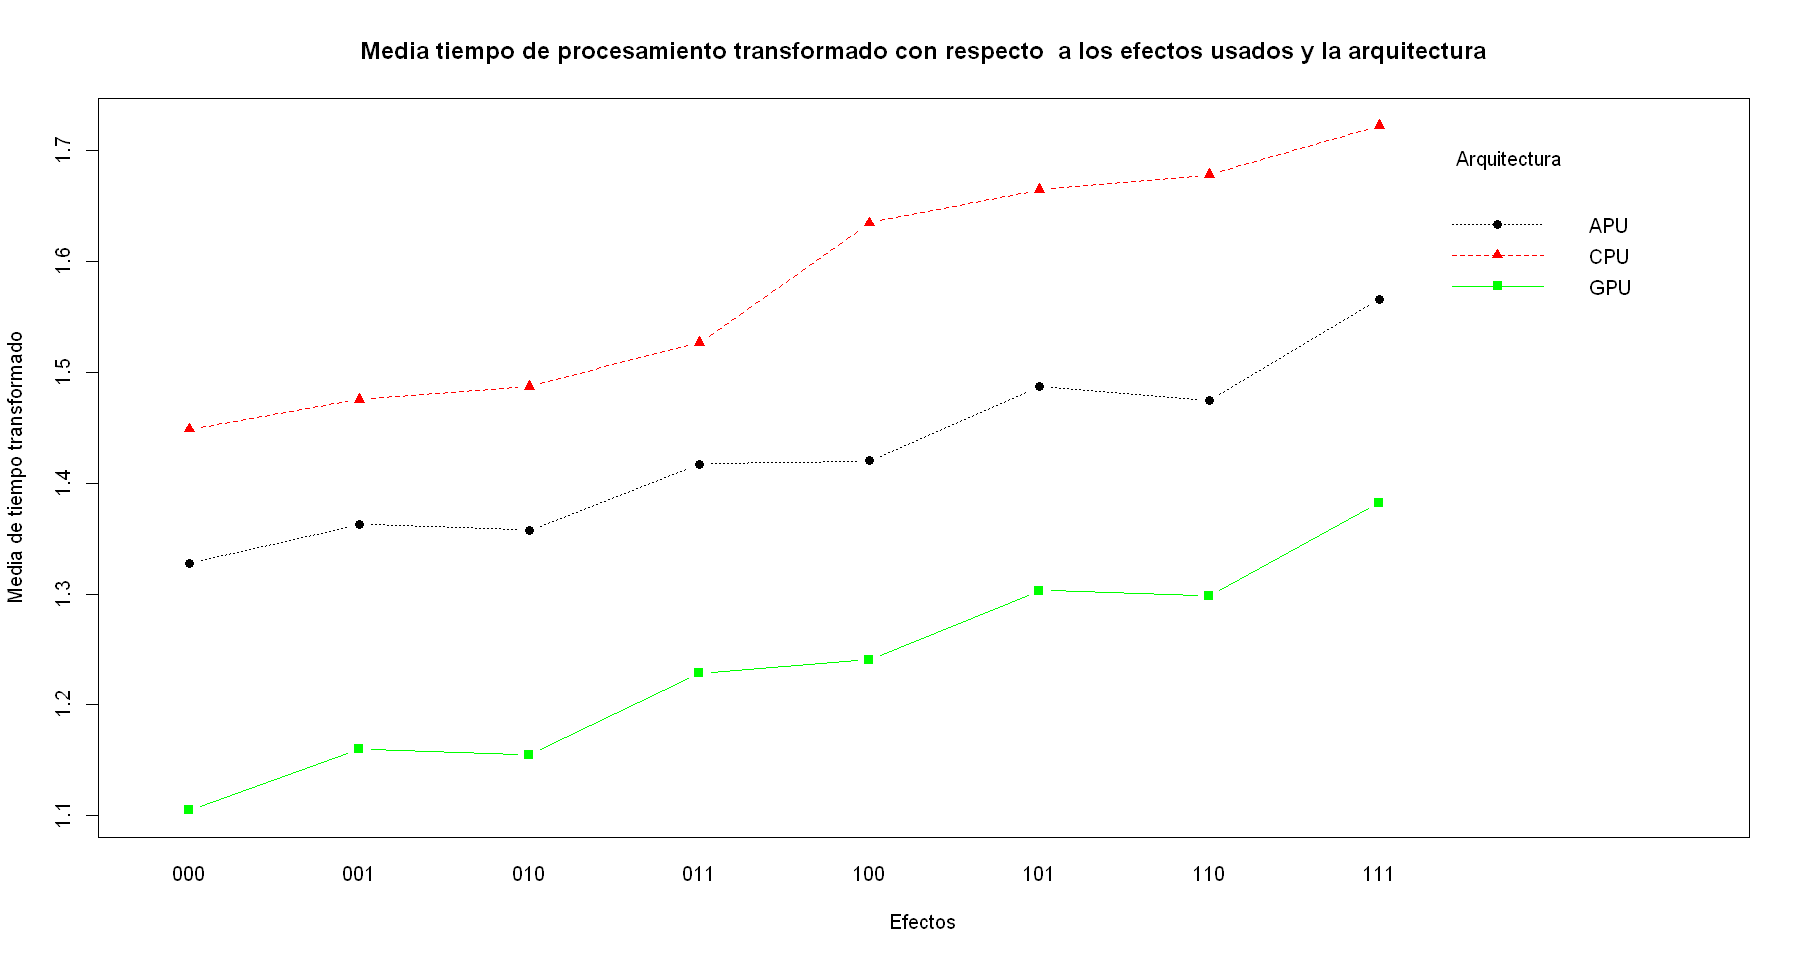

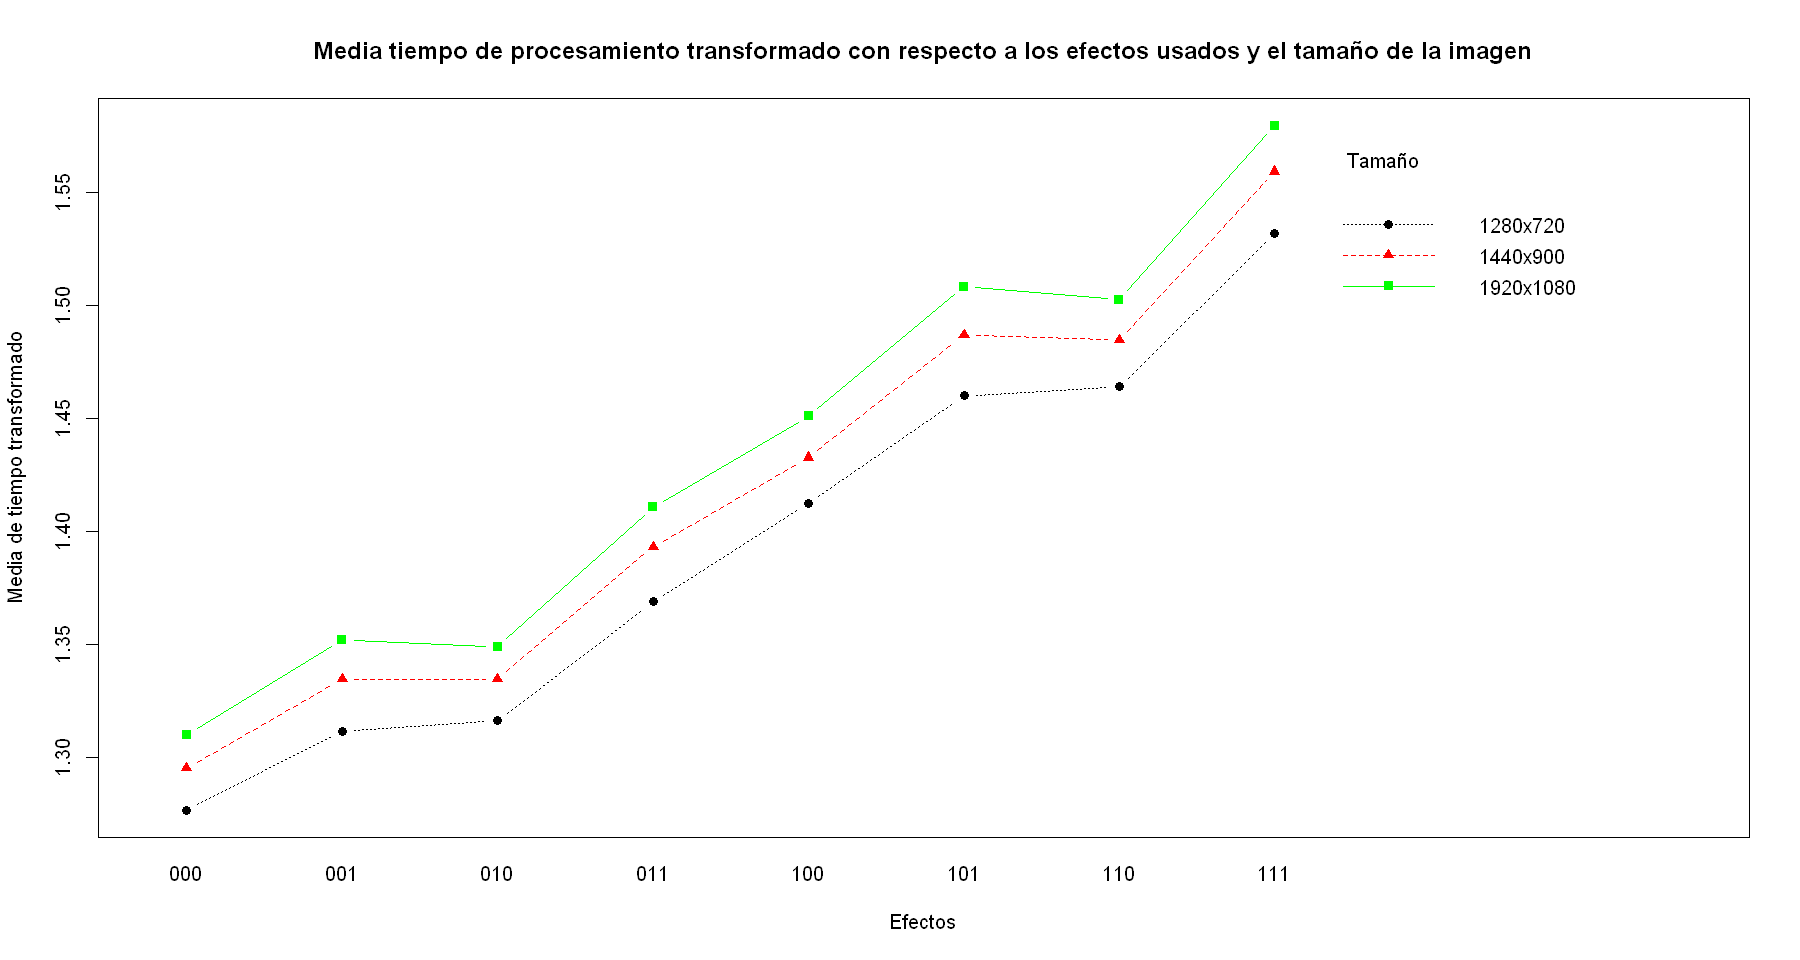

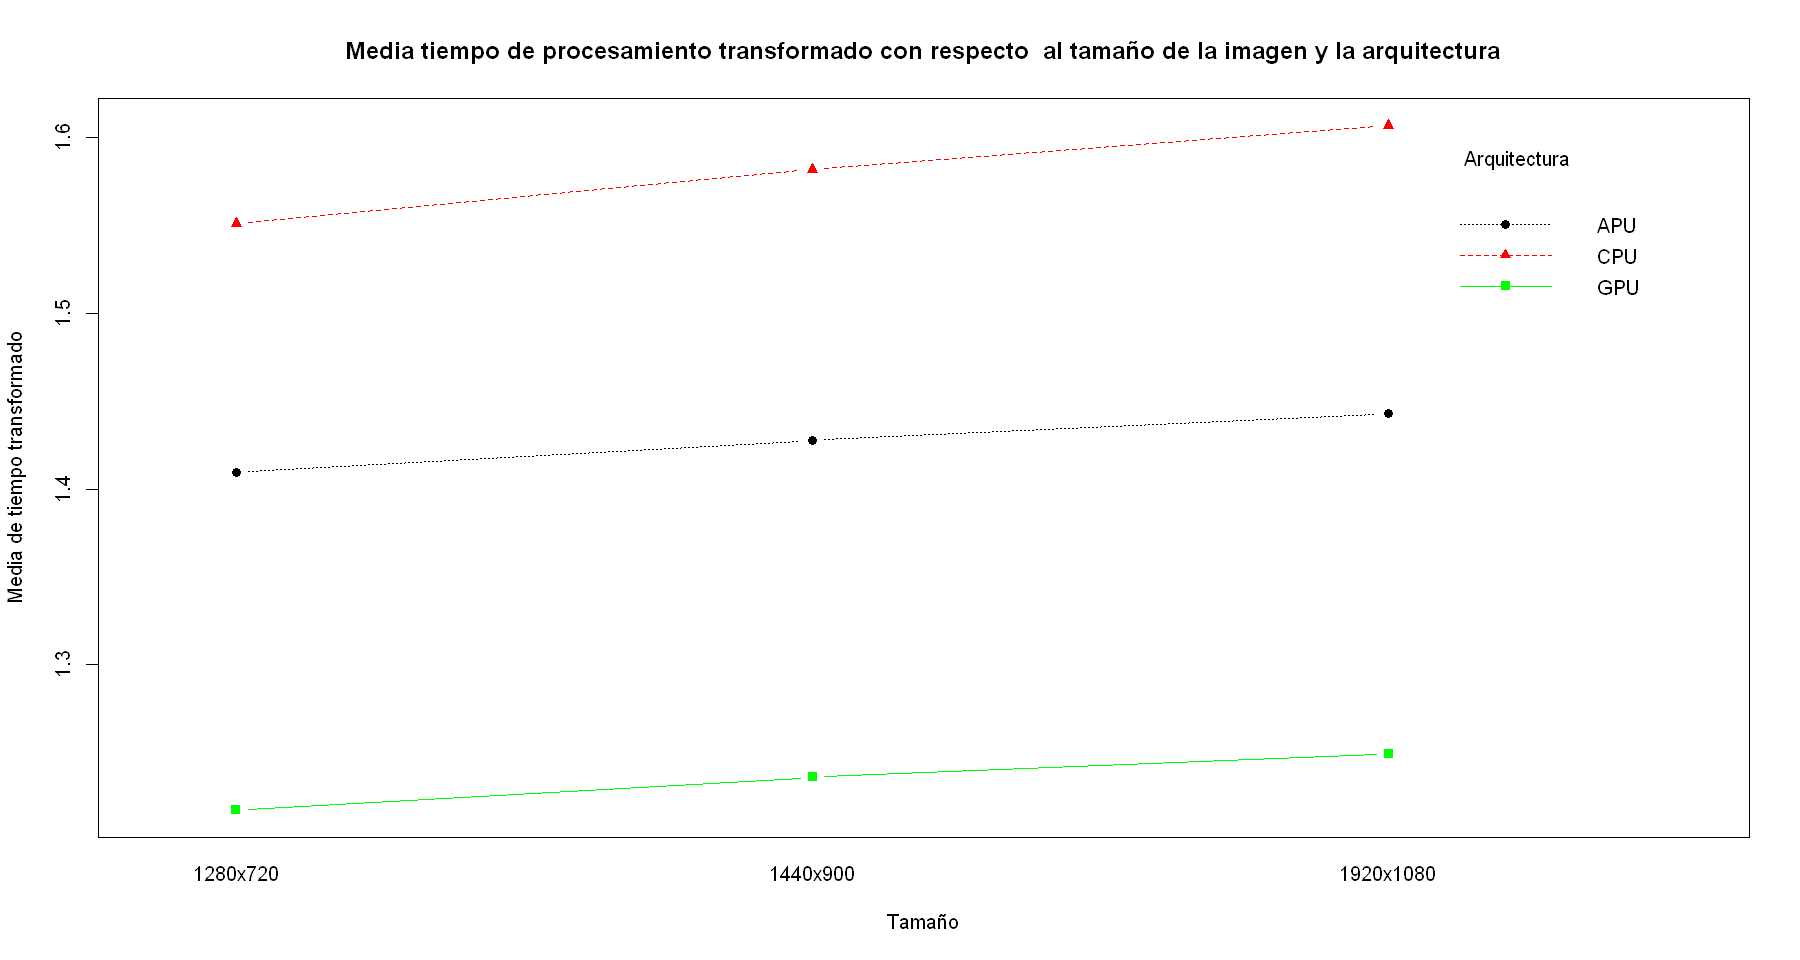

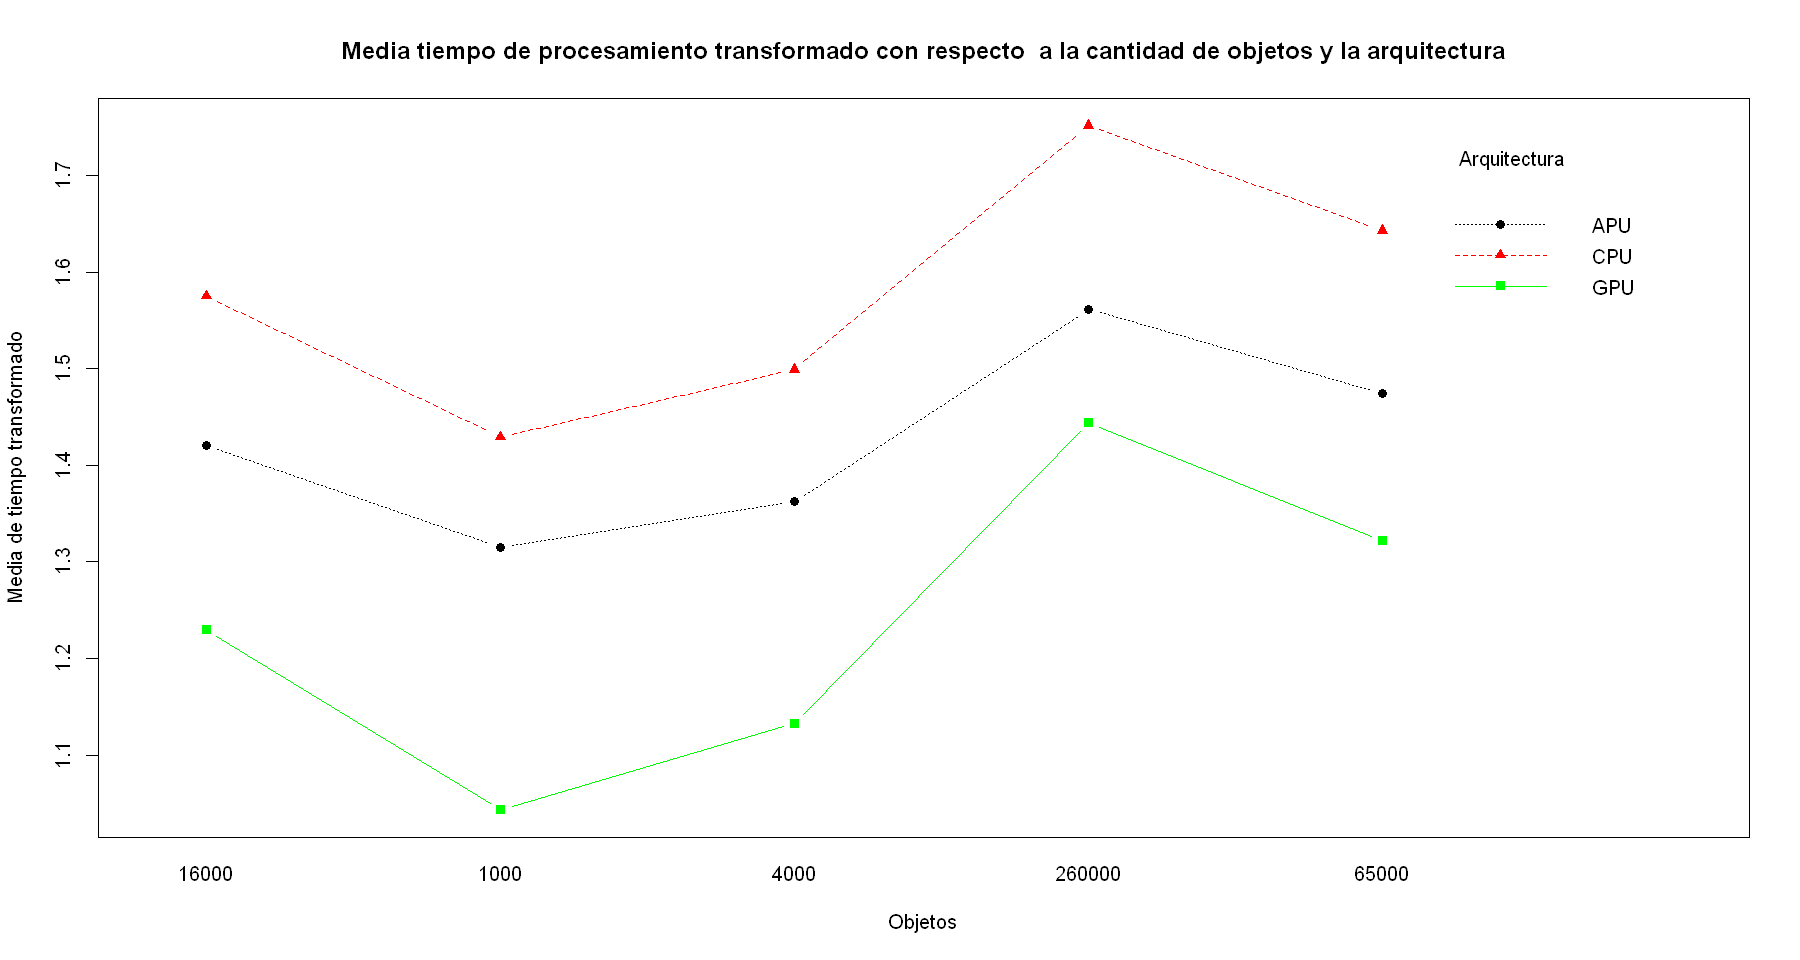

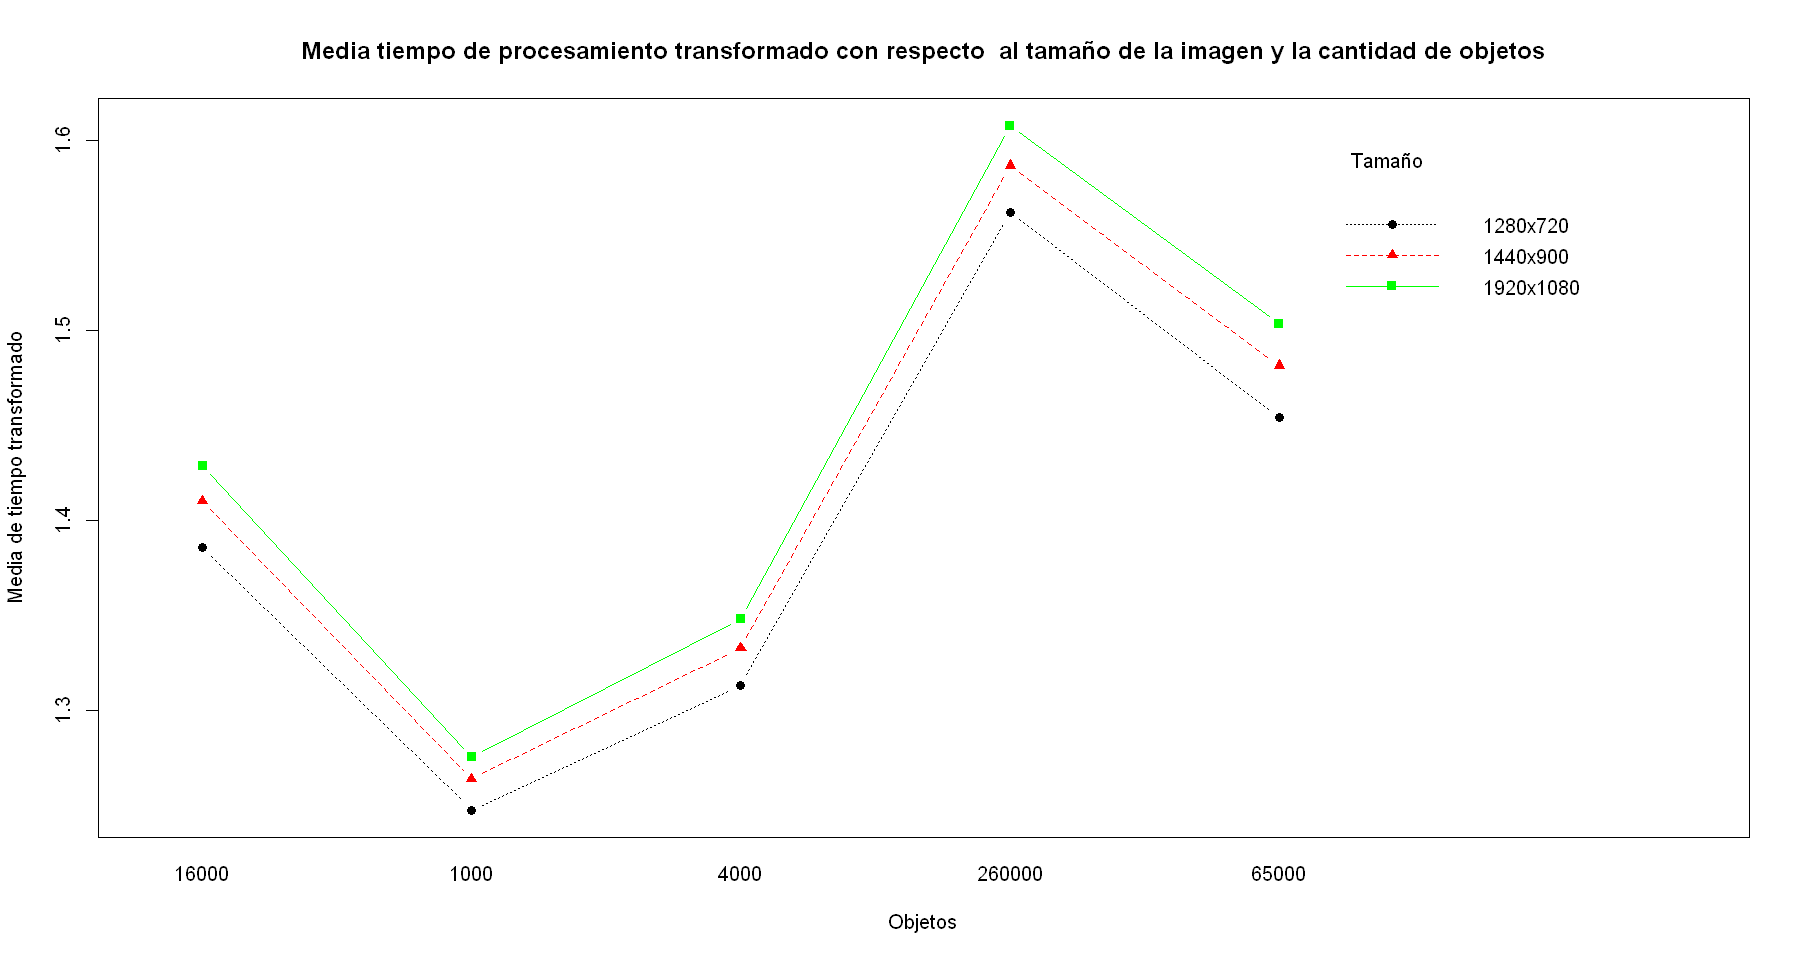

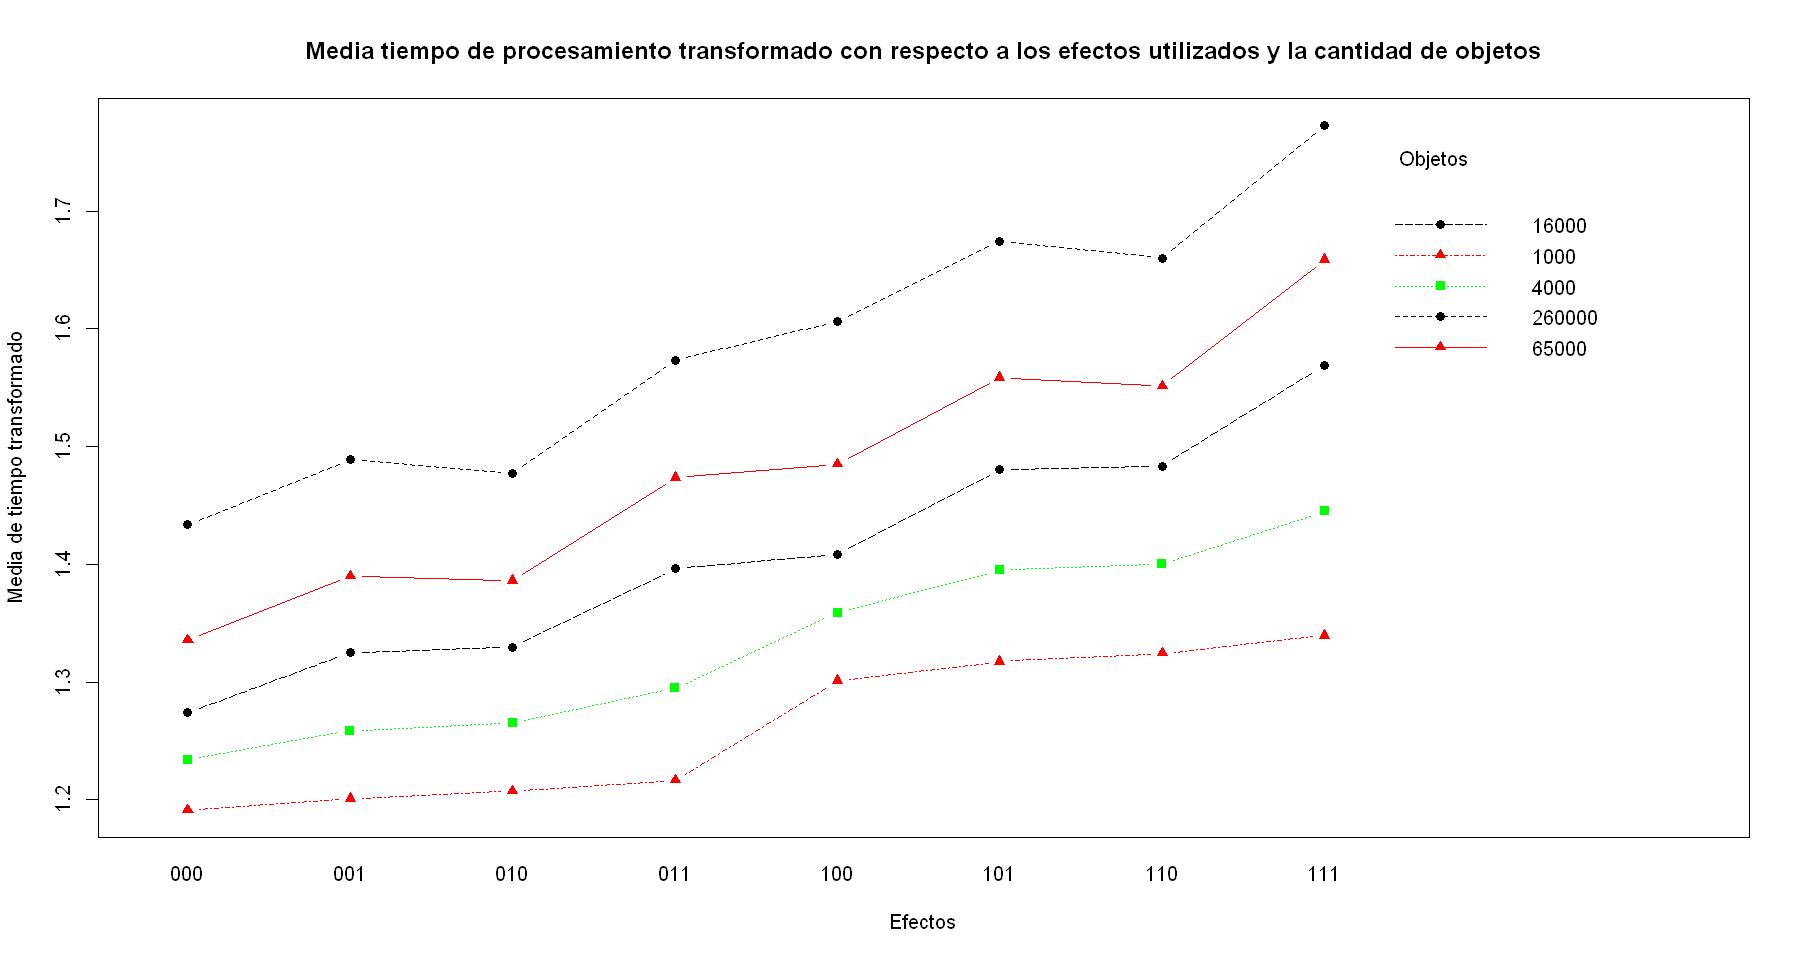

In [120]:
options(repr.plot.width=15, repr.plot.height=8)
par(mfrow=c(1,1))

interaction.plot(x.factor = Data_proc$Efectos,
                 trace.factor = Data_proc$Arquitectura,
                 response = Tiempo_tukg,
                 fun = mean,
                 type = "b",
                 col = c("black", "red", "green"),
                 pch = c(19, 17, 15),
                 fixed = TRUE,
                 leg_bty = "o",
                trace.label = "Arquitectura",
                 xlab="Efectos",
                ylab="Media de tiempo transformado",
               main="Media tiempo de procesamiento transformado con respecto  a los efectos usados y la arquitectura")

interaction.plot(x.factor = Data_proc$Efectos,
                 trace.factor = Data_proc$Tamaño,
                 response = Tiempo_tukg,
                 fun = mean,
                 type = "b",
                 col = c("black", "red", "green"),
                 pch = c(19, 17, 15),
                 fixed = TRUE,
                 leg_bty = "o",
                trace.label = "Tamaño",
                 xlab="Efectos",
                ylab="Media de tiempo transformado",
               main="Media tiempo de procesamiento transformado con respecto a los efectos usados y el tamaño de la imagen")

interaction.plot(x.factor = Data_proc$Tamaño,
                 trace.factor = Data_proc$Arquitectura,
                 response = Tiempo_tukg,
                 fun = mean,
                 type = "b",
                 col = c("black", "red", "green"),
                 pch = c(19, 17, 15),
                 fixed = TRUE,
                 leg_bty = "o",
                trace.label = "Arquitectura",
                 xlab="Tamaño",
                ylab="Media de tiempo transformado",
               main="Media tiempo de procesamiento transformado con respecto  al tamaño de la imagen y la arquitectura")

interaction.plot(x.factor = Data_proc$Objetos,
                 trace.factor = Data_proc$Arquitectura,
                 response = Tiempo_tukg,
                 fun = mean,
                 type = "b",
                 col = c("black", "red", "green"),
                 pch = c(19, 17, 15),
                 fixed = TRUE,
                 leg_bty = "o",
                trace.label = "Arquitectura",
                 xlab="Objetos",
                ylab="Media de tiempo transformado",
               main="Media tiempo de procesamiento transformado con respecto  a la cantidad de objetos y la arquitectura")

interaction.plot(x.factor = Data_proc$Objetos,
                 trace.factor = Data_proc$Tamaño,
                 response = Tiempo_tukg,
                 fun = mean,
                 type = "b",
                 col = c("black", "red", "green"),
                 pch = c(19, 17, 15),
                 fixed = TRUE,
                 leg_bty = "o",
                trace.label = "Tamaño",
                 xlab="Objetos",
                ylab="Media de tiempo transformado",
               main="Media tiempo de procesamiento transformado con respecto  al tamaño de la imagen y la cantidad de objetos")

interaction.plot(x.factor = Data_proc$Efectos,
                 trace.factor = Data_proc$Objetos,
                 response = Tiempo_tukg,
                 fun = mean,
                 type = "b",
                 col = c("black", "red", "green"),
                 pch = c(19, 17, 15),
                 fixed = TRUE,
                 leg_bty = "o",
                trace.label = "Objetos",
                 xlab="Efectos",
                ylab="Media de tiempo transformado",
               main="Media tiempo de procesamiento transformado con respecto a los efectos utilizados y la cantidad de objetos")

## Análisis de lsmeans e Intervalos de confianza

In [33]:
library(emmeans)

marginal = lsmeans(model, ~ Arquitectura)
pairs(marginal, adjust = "tukey")
# CLD
library(multcomp)
CLD = cld(marginal, alpha = 0.05, Letters = letters, adjust = "tukey")
CLD

library(lsmeans)
marginal = lsmeans(model, ~ Arquitectura)
pairs(marginal, adjust = "tukey")
# CLD
library(multcomp)
CLD = cld(marginal, alpha = 0.05, Letters = letters, adjust = "tukey")
CLD

NOTE: Results may be misleading due to involvement in interactions



 contrast  estimate        SE   df  t.ratio p.value
 APU - CPU  -0.1530 0.0002373 1440 -644.828  <.0001
 APU - GPU   0.1925 0.0002373 1440  811.385  <.0001
 CPU - GPU   0.3455 0.0002373 1440 1456.214  <.0001

Results are averaged over the levels of: Efectos, Objetos, Tamaño 
P value adjustment: tukey method for comparing a family of 3 estimates 

Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



,Arquitectura,lsmean,SE,df,lower.CL,upper.CL,.group
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3,GPU,1.234148,0.0001677857,1440,1.233747,1.234549,a
1,APU,1.426678,0.0001677857,1440,1.426277,1.427079,b
2,CPU,1.579686,0.0001677857,1440,1.579285,1.580087,c


NOTE: Results may be misleading due to involvement in interactions



 contrast  estimate        SE   df  t.ratio p.value
 APU - CPU  -0.1530 0.0002373 1440 -644.828  <.0001
 APU - GPU   0.1925 0.0002373 1440  811.385  <.0001
 CPU - GPU   0.3455 0.0002373 1440 1456.214  <.0001

Results are averaged over the levels of: Efectos, Objetos, Tamaño 
P value adjustment: tukey method for comparing a family of 3 estimates 

Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



,Arquitectura,lsmean,SE,df,lower.CL,upper.CL,.group
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3,GPU,1.234148,0.0001677857,1440,1.233747,1.234549,a
1,APU,1.426678,0.0001677857,1440,1.426277,1.427079,b
2,CPU,1.579686,0.0001677857,1440,1.579285,1.580087,c


Objetos,Arquitectura,n,mean,sd,min,Q1,median,Q3,max,se
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16000,APU,120,1.420,0.083,1.304,1.353,1.408,1.478,1.599,0.00758
1000,APU,120,1.315,0.035,1.262,1.283,1.305,1.348,1.377,0.00320
4000,APU,120,1.362,0.056,1.288,1.314,1.350,1.407,1.483,0.00511
260000,APU,120,1.561,0.112,1.390,1.464,1.564,1.630,1.795,0.01020
65000,APU,120,1.474,0.098,1.328,1.394,1.464,1.535,1.690,0.00895
16000,CPU,120,1.575,0.106,1.400,1.484,1.570,1.664,1.759,0.00968
1000,CPU,120,1.429,0.089,1.309,1.346,1.425,1.514,1.550,0.00812
4000,CPU,120,1.499,0.096,1.356,1.409,1.494,1.590,1.646,0.00876
260000,CPU,120,1.752,0.115,1.576,1.642,1.756,1.850,1.954,0.01050


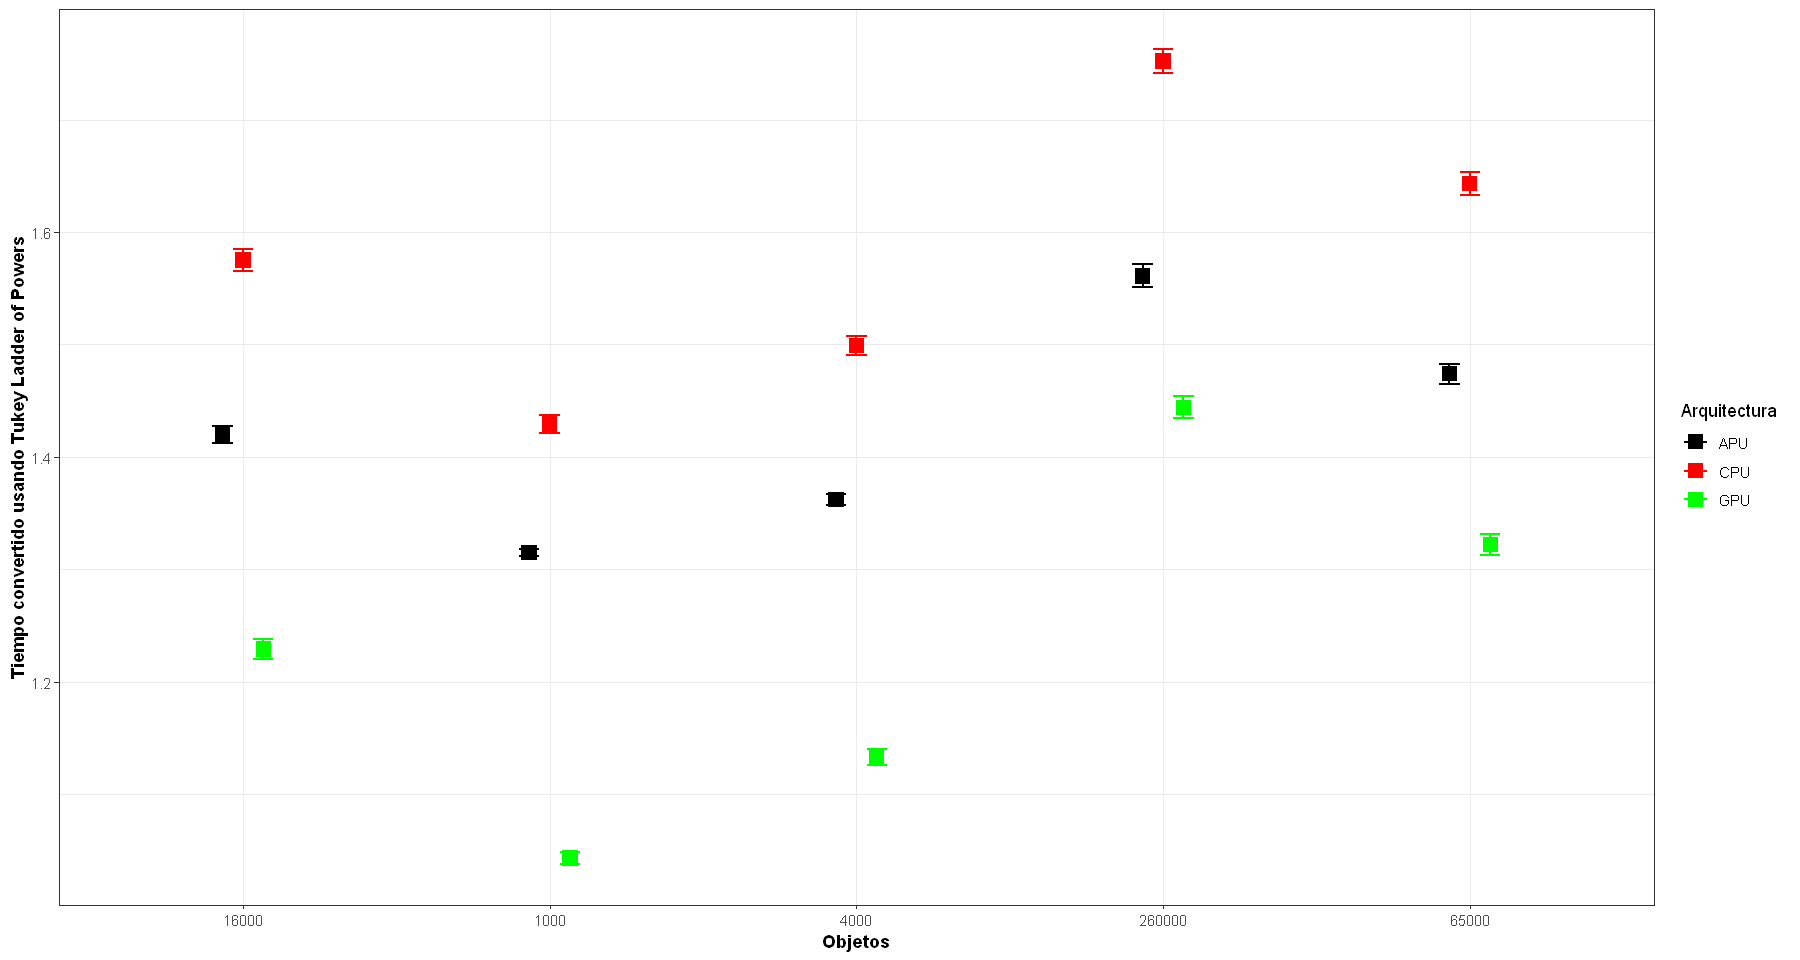

In [34]:
library(FSA)
Sum = Summarize(Tiempo_tukg ~ Objetos + Arquitectura, data = Data_proc, digits = 3)
# Agregamos el se
Sum$se = Sum$sd / sqrt(Sum$n)
Sum$se = signif(Sum$se, digits = 3)
Sum
# Ordenamos
Sum$Objetos = factor(Sum$Objetos, levels = unique(Sum$Objetos))
# Graficamos
library(ggplot2)
pd = position_dodge(.2)
ggplot(Sum, aes(x = Objetos,
                y = mean,
                color = Arquitectura)) +
  geom_errorbar(aes(ymin = mean - se,
                    ymax = mean + se),
                    width = .2, size = 0.7, position = pd) +
  geom_point(shape = 15, size = 4, position = pd) +
  theme_bw() + 
  theme(axis.title = element_text(face = "bold")) +
  scale_colour_manual(values = c("black", "red", "green")) +
                        ylab("Tiempo convertido usando Tukey Ladder of Powers")

## 6. Análisis de gráfico cajas del tiempo en función de la arquitectura y de los otros factores del experimento

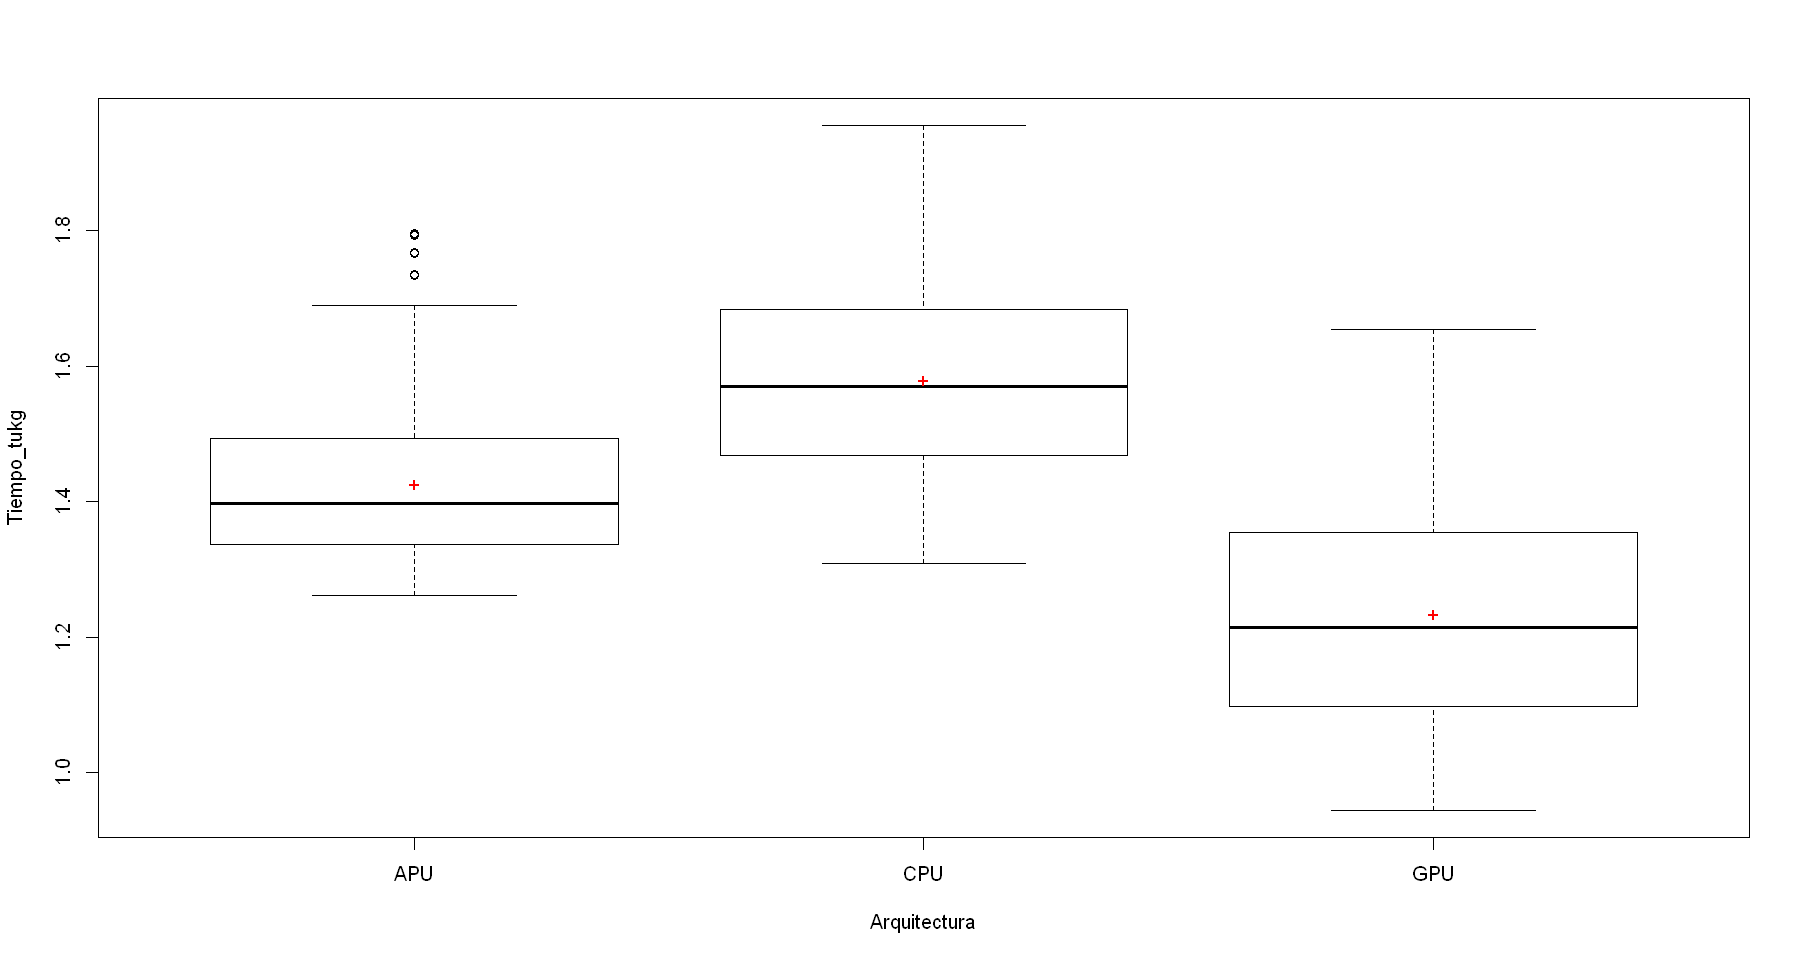

In [35]:
M = tapply(Tiempo_tukg, 
           INDEX= Data_proc$Arquitectura, 
           FUN = mean)
boxplot(Tiempo_tukg ~ Arquitectura, 
        data = Data_proc)
points(M, 
       col="red",
       pch="+", cex=1)

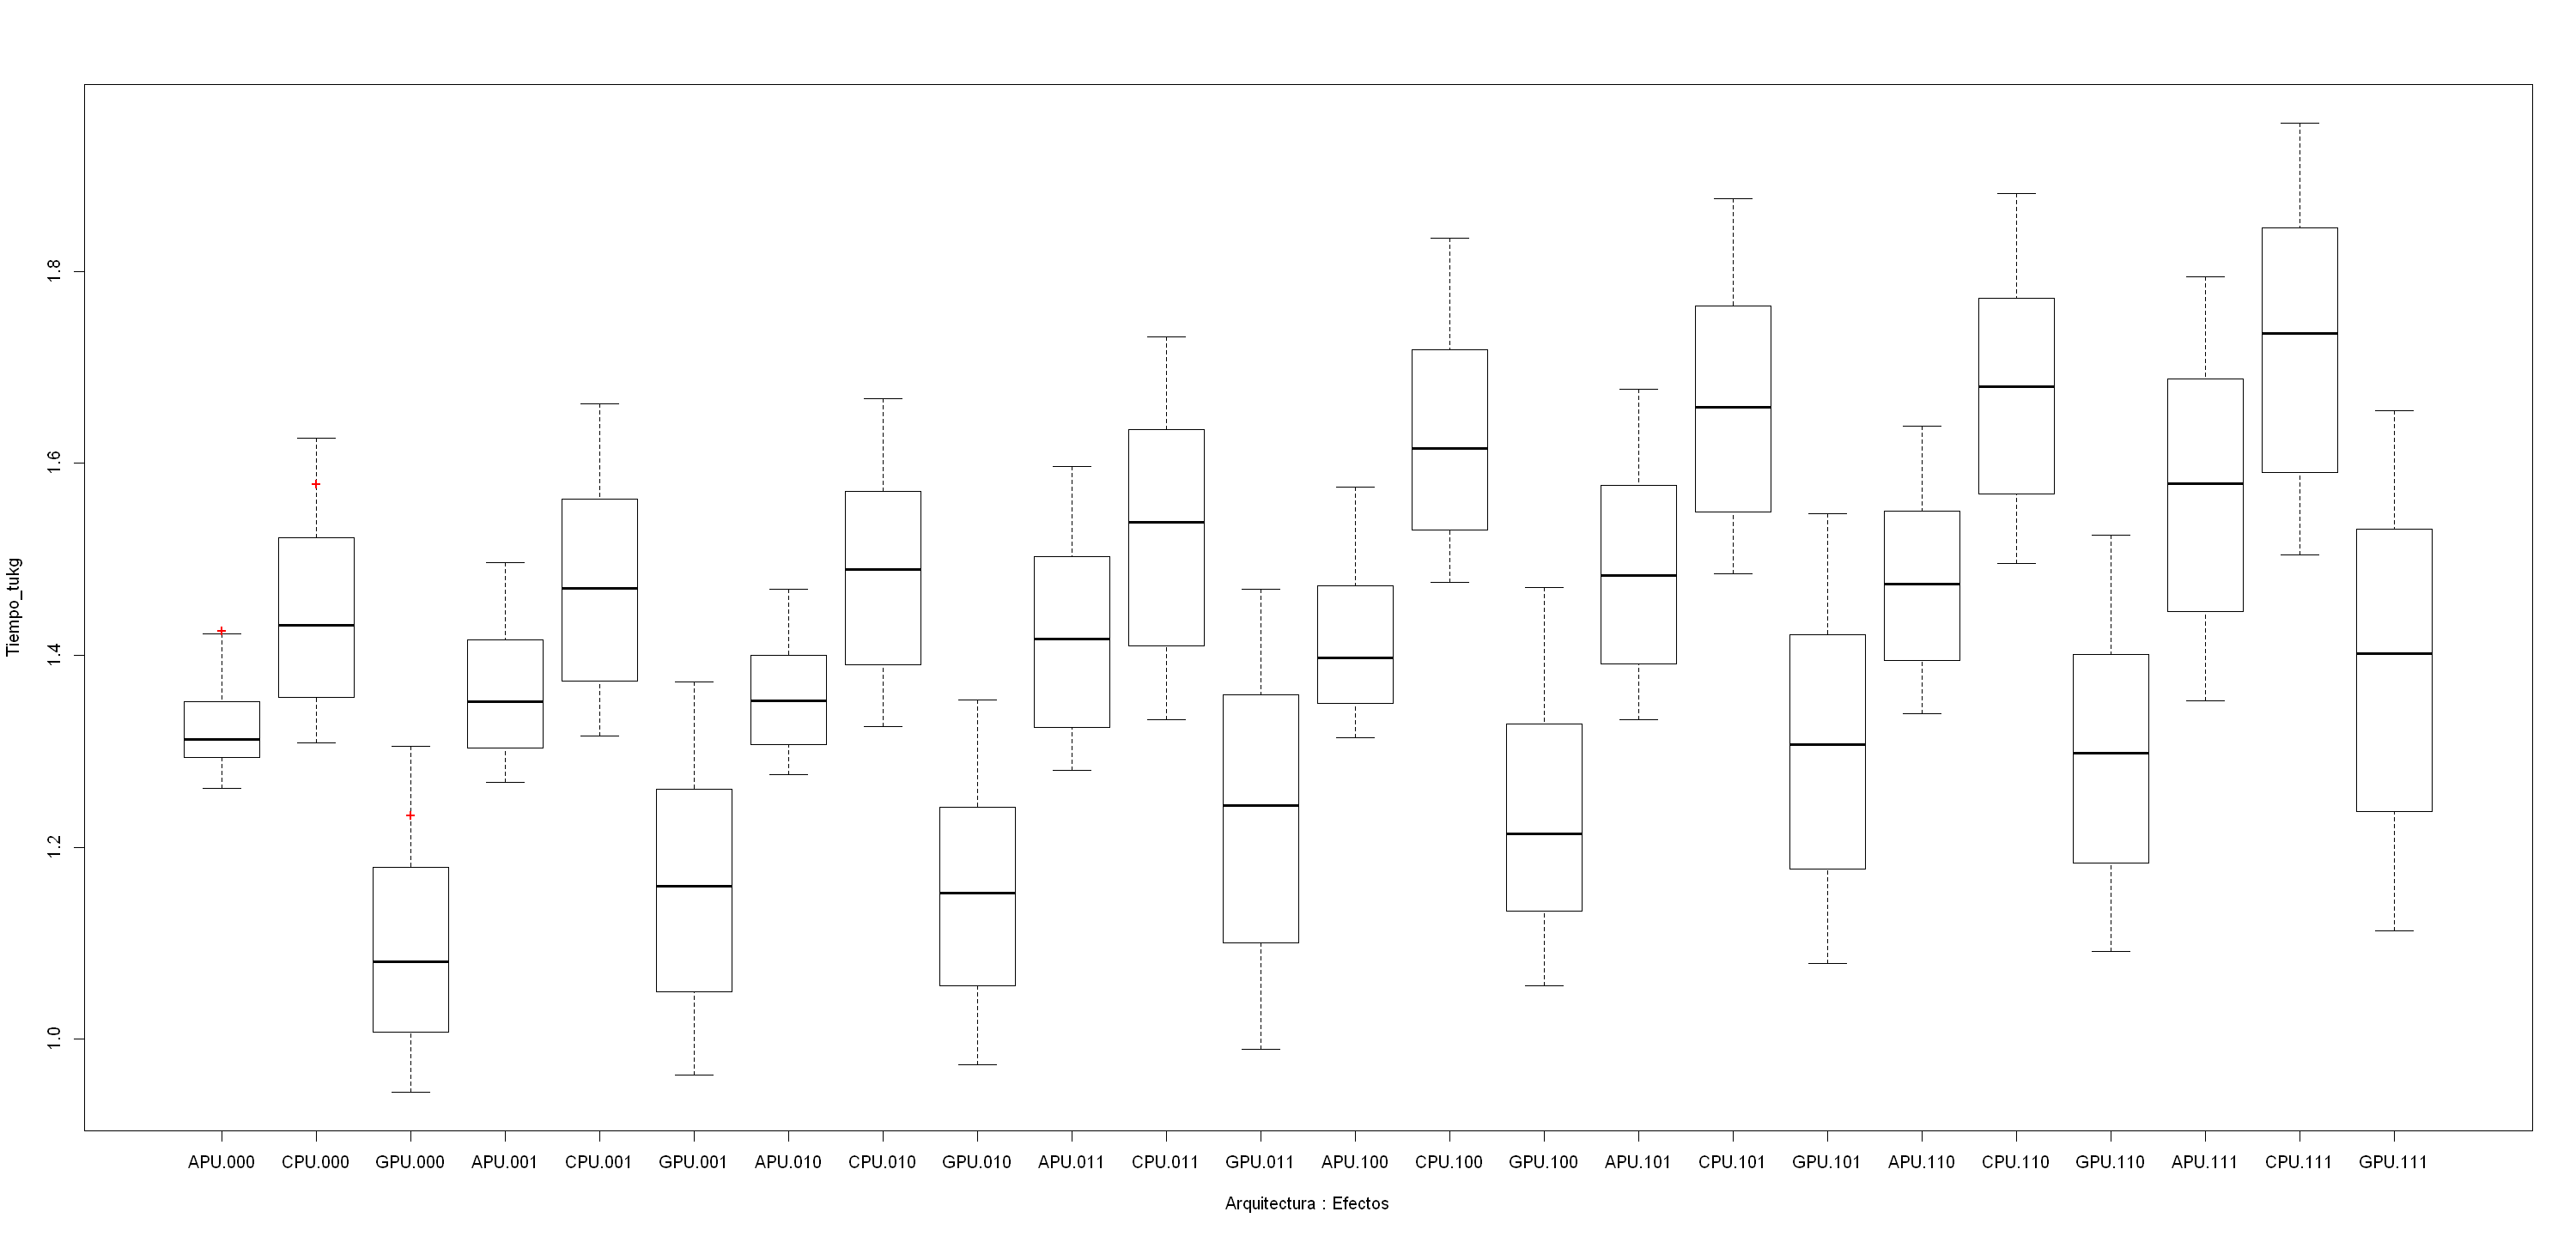

In [36]:
options(repr.plot.width=25, repr.plot.height=12)
par(mfrow=c(1,1))

M = tapply(Tiempo_tukg, 
           INDEX= Data_proc$Arquitectura, 
           FUN = mean)
boxplot(Tiempo_tukg ~ Arquitectura + Efectos, 
        data = Data_proc)
points(M, 
       col="red",
       pch="+", cex=1)

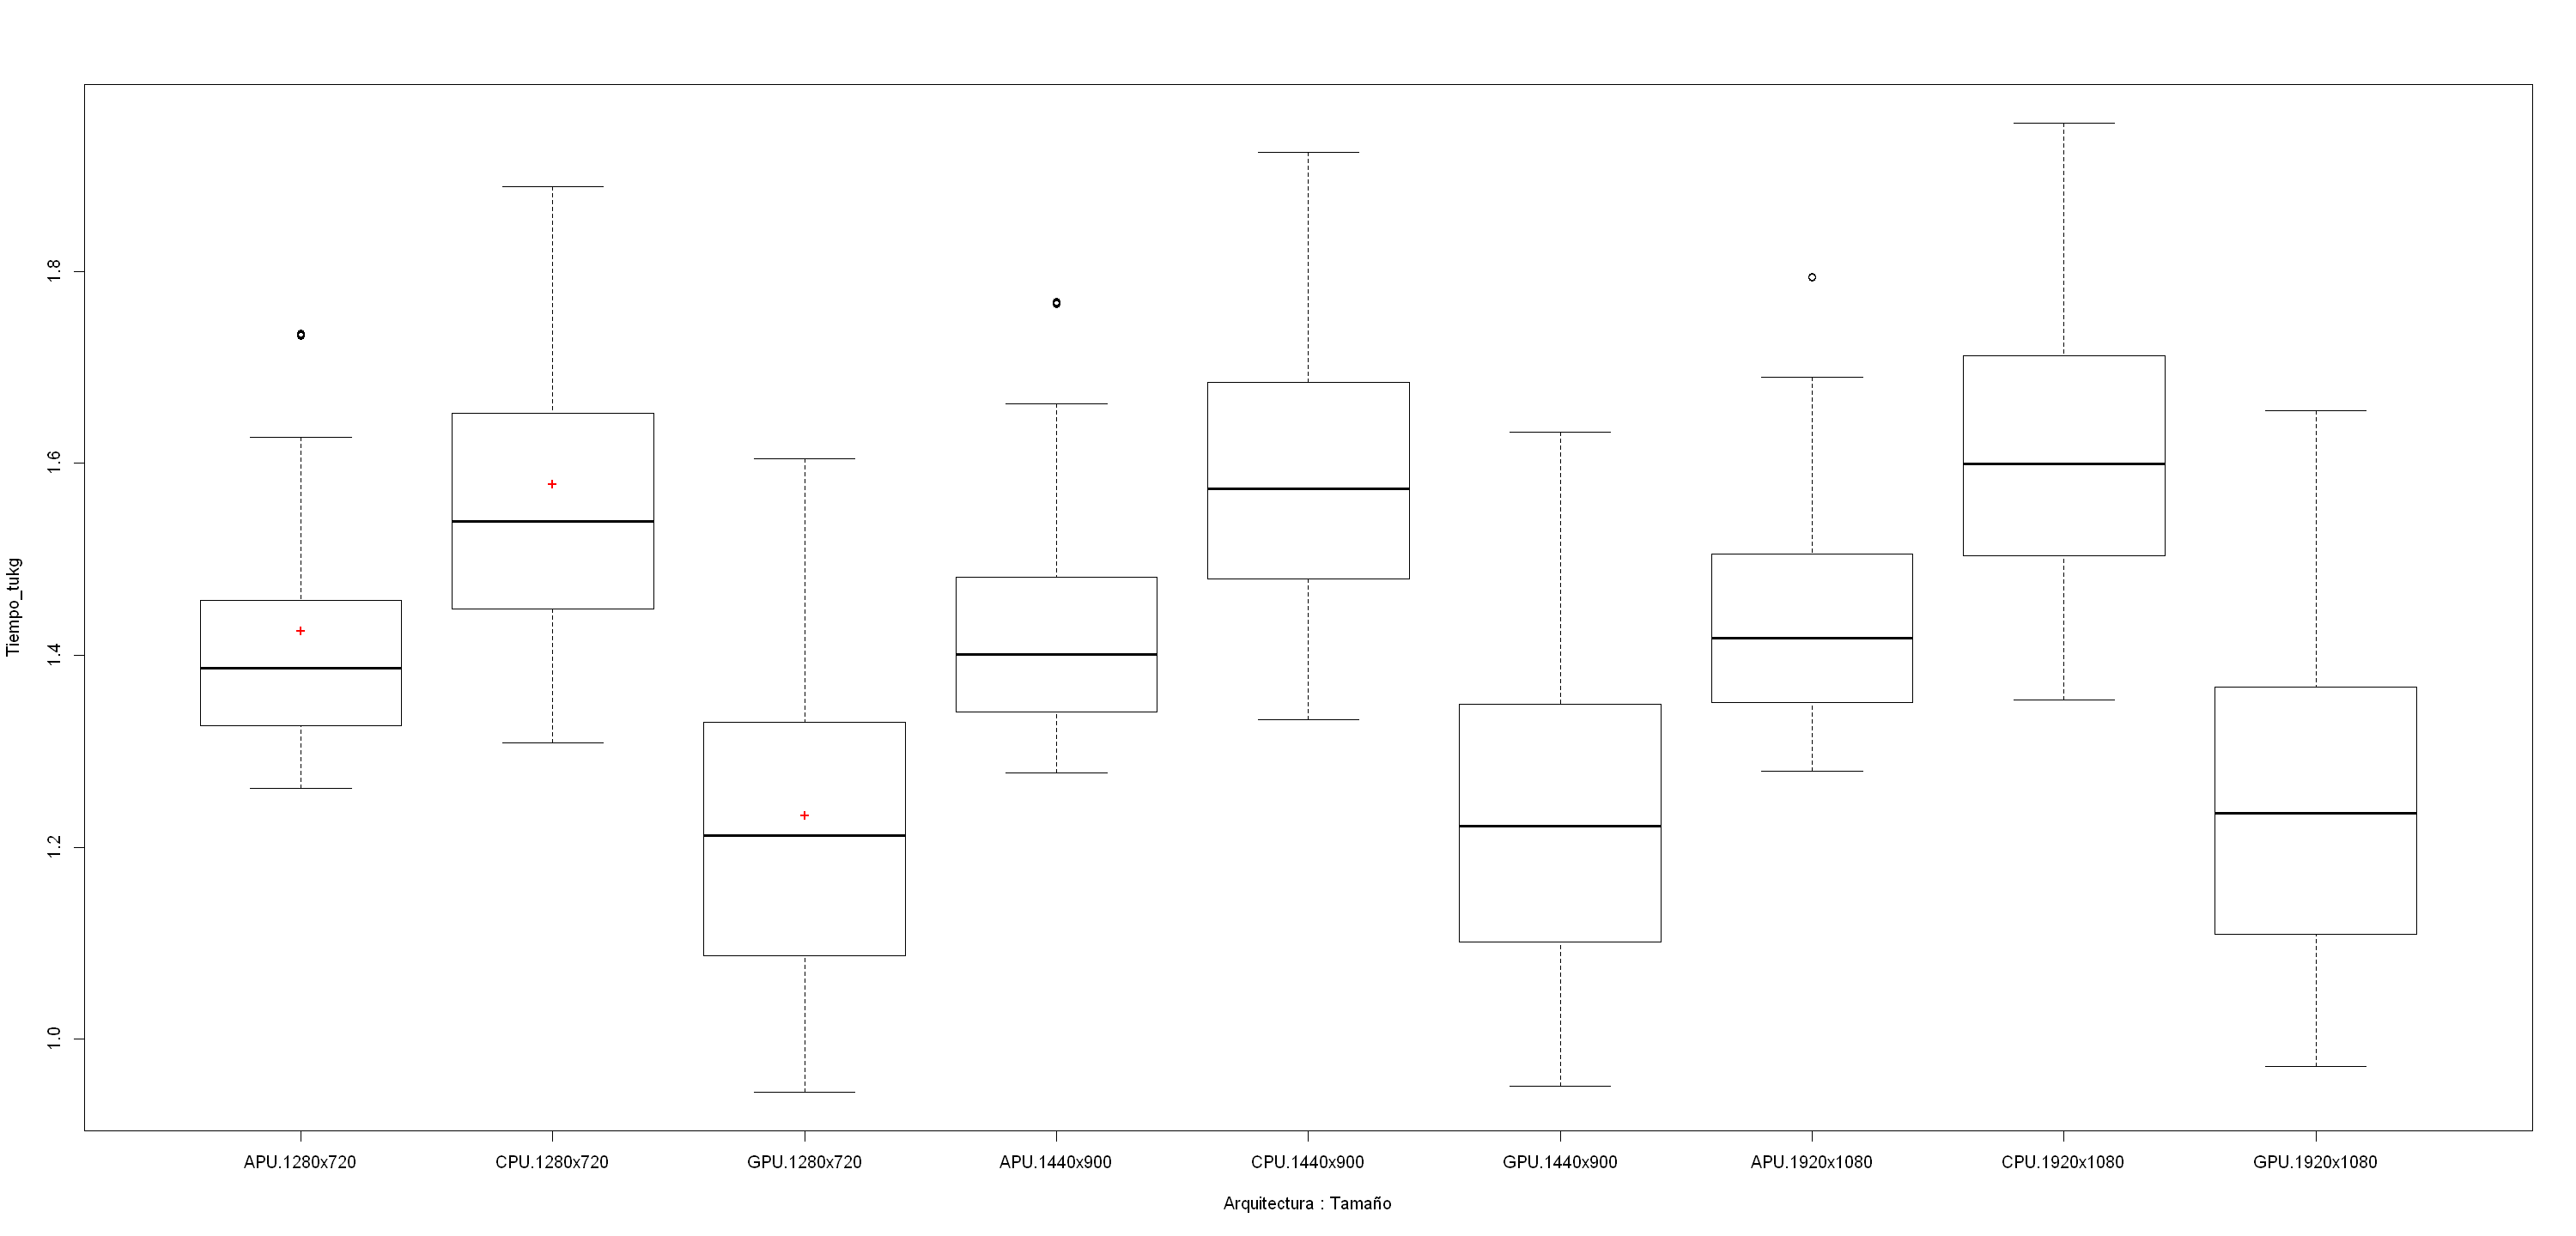

In [37]:
M = tapply(Tiempo_tukg, 
           INDEX= Data_proc$Arquitectura, 
           FUN = mean)
boxplot(Tiempo_tukg ~ Arquitectura + Tamaño, 
        data = Data_proc)
points(M, 
       col="red",
       pch="+", cex=1)

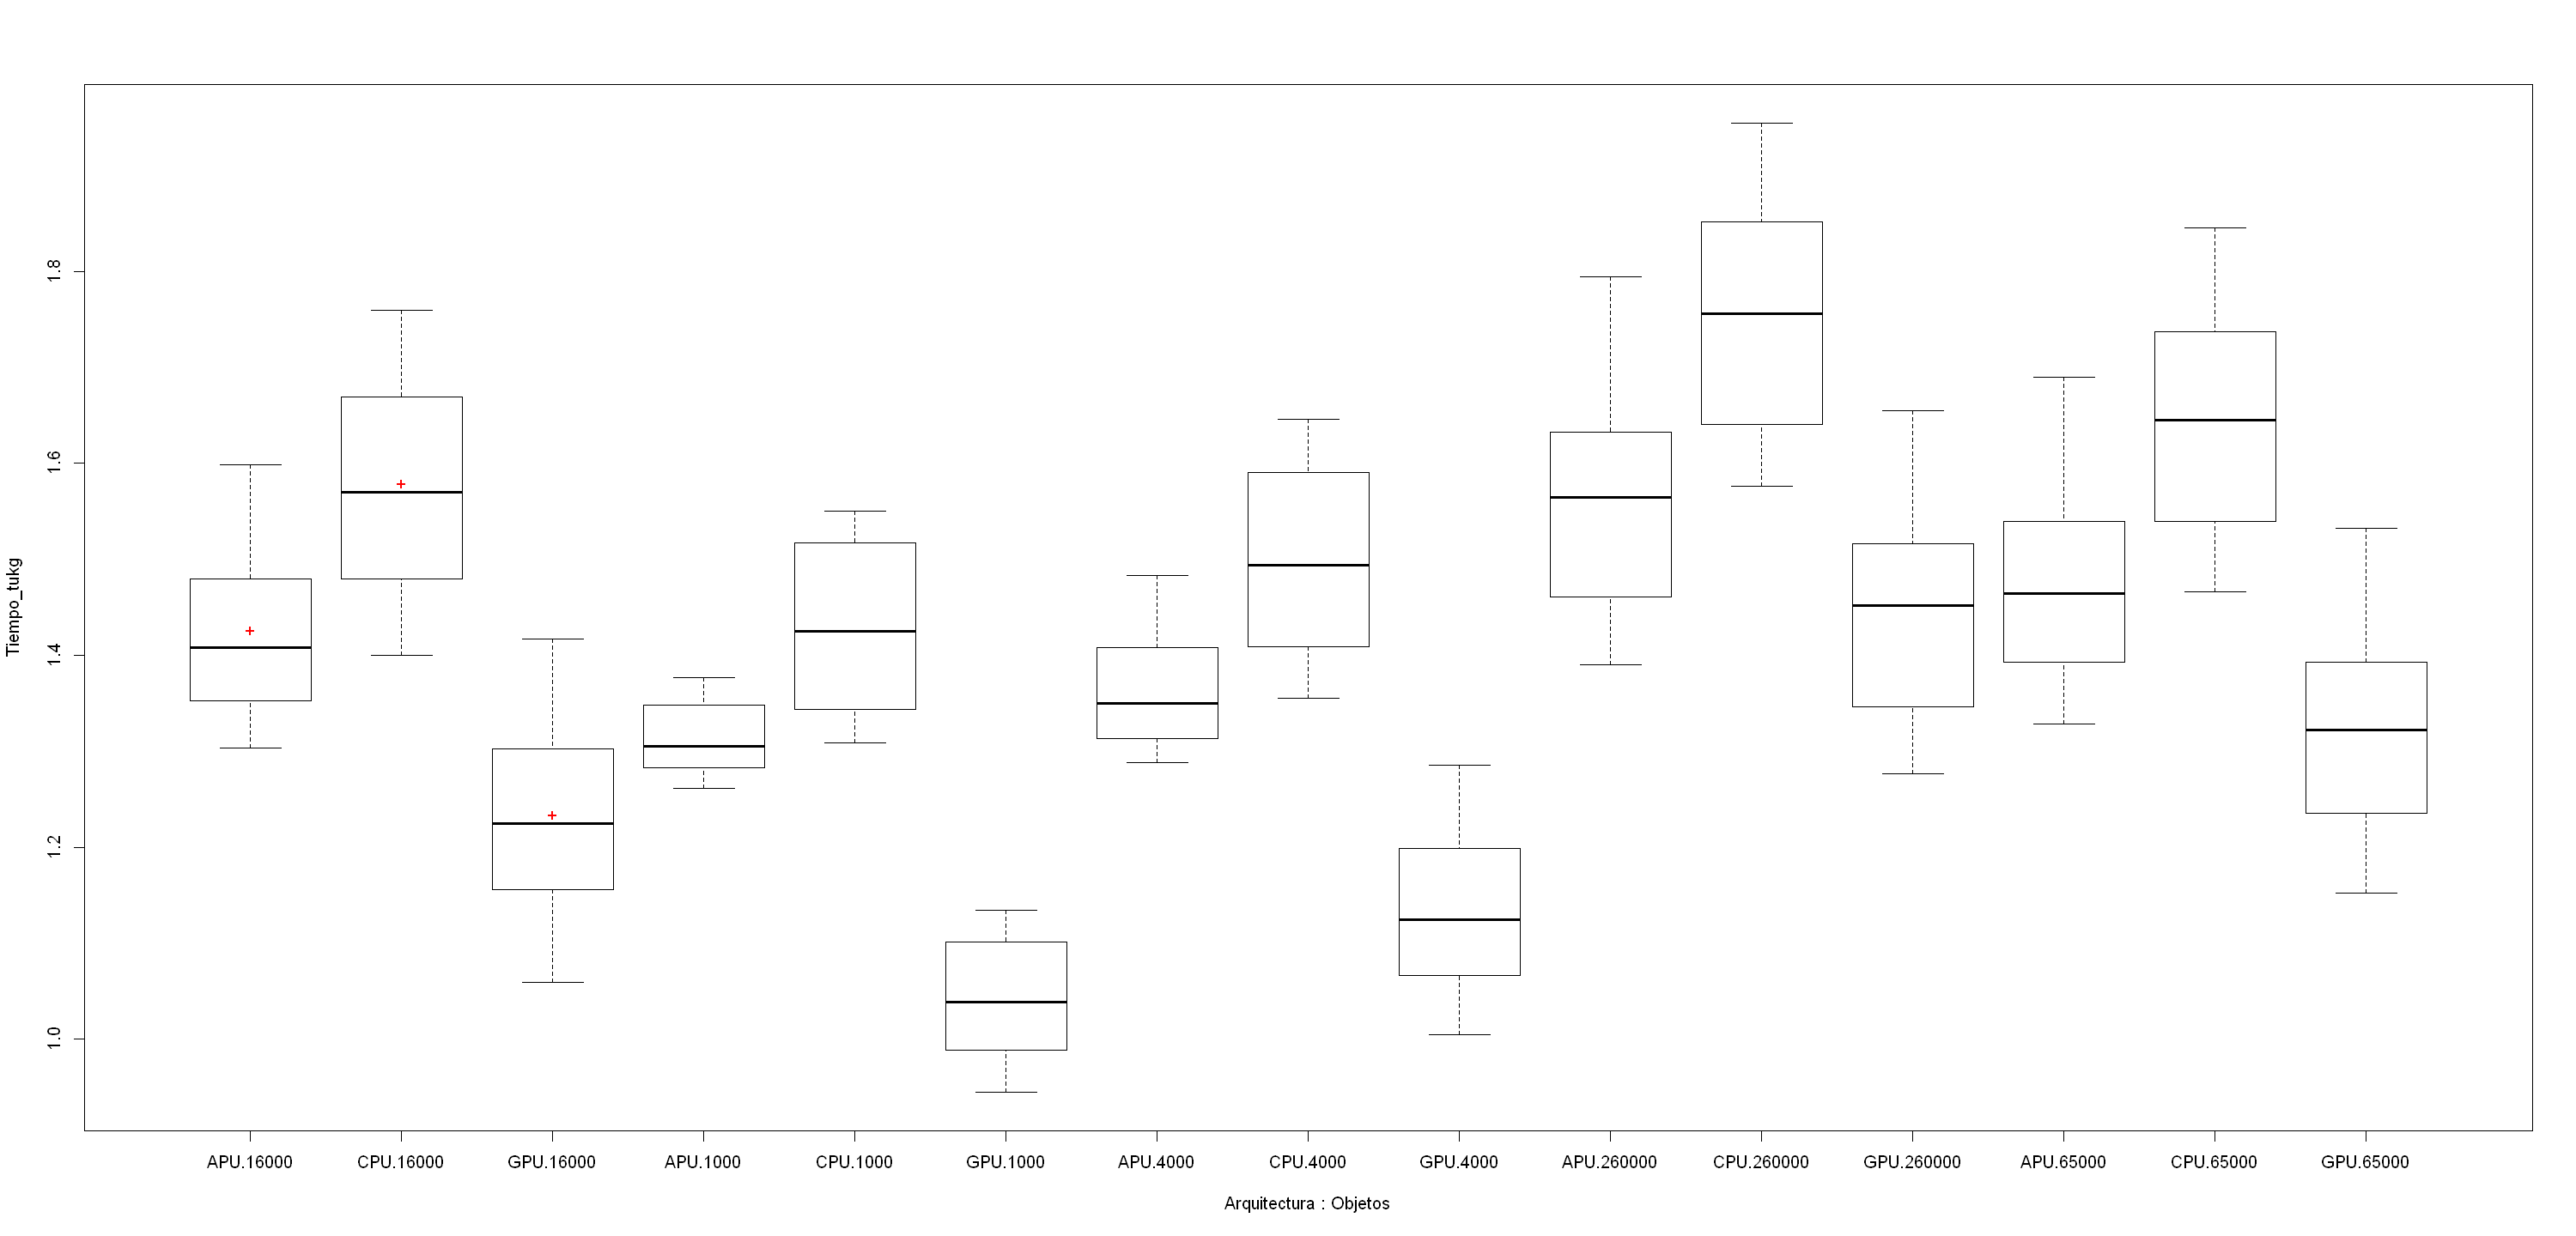

In [38]:
M = tapply(Tiempo_tukg, 
           INDEX= Data_proc$Arquitectura, 
           FUN = mean)
boxplot(Tiempo_tukg ~ Arquitectura+Objetos, 
        data = Data_proc)
points(M, 
       col="red",
       pch="+", cex=1)

## 7. Pruebas t entre los escenarios que tenga sentido hacerlo

In [39]:
leveneTest(Tiempo_tukg ~ Arquitectura, data = Data_proc)
leveneTest(Tiempo_tukg ~ Efectos, data = Data_proc)
leveneTest(Tiempo_tukg ~ Tamaño, data = Data_proc)
leveneTest(Tiempo_tukg ~ Objetos, data = Data_proc)

model_p7 = lm(Tiempo_tukg ~ Tamaño, data = Data_proc)
library(car)
Anova(model_p7, type = "II")
library(multcompView)
marginal = lsmeans(model_p7, ~ Tamaño)
pairs(marginal, adjust="tukey")

model_p7_2 = lm(Tiempo_tukg ~ Objetos, data = Data_proc)
library(car)
Anova(model_p7_2, type = "II")
library(multcompView)
marginal = lsmeans(model_p7_2, ~ Objetos)
pairs(marginal, adjust="tukey")

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,41.6342,2.113067e-18
,1797,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,7,4.322796,9.302558e-05
,1792,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,1.245121,0.2881544
,1797,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,4,0.03743203,0.997331
,1795,NA,NA


,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Tamaño,0.4870806,2,5.867097,0.002885594
Residuals,74.5925888,1797,NA,NA


 contrast             estimate     SE   df t.ratio p.value
 1280x720 - 1440x900   -0.0224 0.0118 1797  -1.905  0.1375
 1280x720 - 1920x1080  -0.0402 0.0118 1797  -3.418  0.0019
 1440x900 - 1920x1080  -0.0178 0.0118 1797  -1.513  0.2850

P value adjustment: tukey method for comparing a family of 3 estimates 

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Objetos,22.92722,4,197.2792,2.583227e-140
Residuals,52.15245,1795,NA,NA


 contrast       estimate     SE   df t.ratio p.value
 16000 - 1000     0.1460 0.0127 1795  11.490  <.0001
 16000 - 4000     0.0768 0.0127 1795   6.044  <.0001
 16000 - 260000  -0.1775 0.0127 1795 -13.970  <.0001
 16000 - 65000   -0.0715 0.0127 1795  -5.630  <.0001
 1000 - 4000     -0.0692 0.0127 1795  -5.446  <.0001
 1000 - 260000   -0.3235 0.0127 1795 -25.460  <.0001
 1000 - 65000    -0.2175 0.0127 1795 -17.120  <.0001
 4000 - 260000   -0.2543 0.0127 1795 -20.014  <.0001
 4000 - 65000    -0.1483 0.0127 1795 -11.674  <.0001
 260000 - 65000   0.1060 0.0127 1795   8.340  <.0001

P value adjustment: tukey method for comparing a family of 5 estimates 

In [40]:
library(lsmeans)
marginal = lsmeans(model_p7, ~ Tamaño)
pairs(marginal, adjust = "tukey")
# CLD
library(multcomp)
CLD = cld(marginal, alpha = 0.05, Letters = letters, adjust = "tukey")
CLD


 contrast             estimate     SE   df t.ratio p.value
 1280x720 - 1440x900   -0.0224 0.0118 1797  -1.905  0.1375
 1280x720 - 1920x1080  -0.0402 0.0118 1797  -3.418  0.0019
 1440x900 - 1920x1080  -0.0178 0.0118 1797  -1.513  0.2850

P value adjustment: tukey method for comparing a family of 3 estimates 

Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



,Tamaño,lsmean,SE,df,lower.CL,upper.CL,.group
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1280x720,1.392632,0.008317603,1797,1.372753,1.412511,a
2,1440x900,1.415042,0.008317603,1797,1.395163,1.434920,ab
3,1920x1080,1.432838,0.008317603,1797,1.412959,1.452717,b


In [64]:
library(lsmeans)
marginal = lsmeans(model_p7_2, ~ Objetos)
pairs(marginal, adjust = "tukey")
# CLD
library(multcomp)
CLD = cld(marginal, alpha = 0.05, Letters = letters, adjust = "tukey")
CLD


 contrast       estimate     SE   df t.ratio p.value
 16000 - 1000     0.1460 0.0127 1795  11.490  <.0001
 16000 - 4000     0.0768 0.0127 1795   6.044  <.0001
 16000 - 260000  -0.1775 0.0127 1795 -13.970  <.0001
 16000 - 65000   -0.0715 0.0127 1795  -5.630  <.0001
 1000 - 4000     -0.0692 0.0127 1795  -5.446  <.0001
 1000 - 260000   -0.3235 0.0127 1795 -25.460  <.0001
 1000 - 65000    -0.2175 0.0127 1795 -17.120  <.0001
 4000 - 260000   -0.2543 0.0127 1795 -20.014  <.0001
 4000 - 65000    -0.1483 0.0127 1795 -11.674  <.0001
 260000 - 65000   0.1060 0.0127 1795   8.340  <.0001

P value adjustment: tukey method for comparing a family of 5 estimates 

Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



,Objetos,lsmean,SE,df,lower.CL,upper.CL,.group
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2,1000,1.262278,0.008983672,1795,1.239176,1.285379,a
3,4000,1.331463,0.008983672,1795,1.308362,1.354564,b
1,16000,1.408253,0.008983672,1795,1.385152,1.431355,c
5,65000,1.479783,0.008983672,1795,1.456682,1.502885,d
4,260000,1.585742,0.008983672,1795,1.562641,1.608844,e


## 8. Gráfico de cajas del tiempo, en función de únicamente la arquitectura

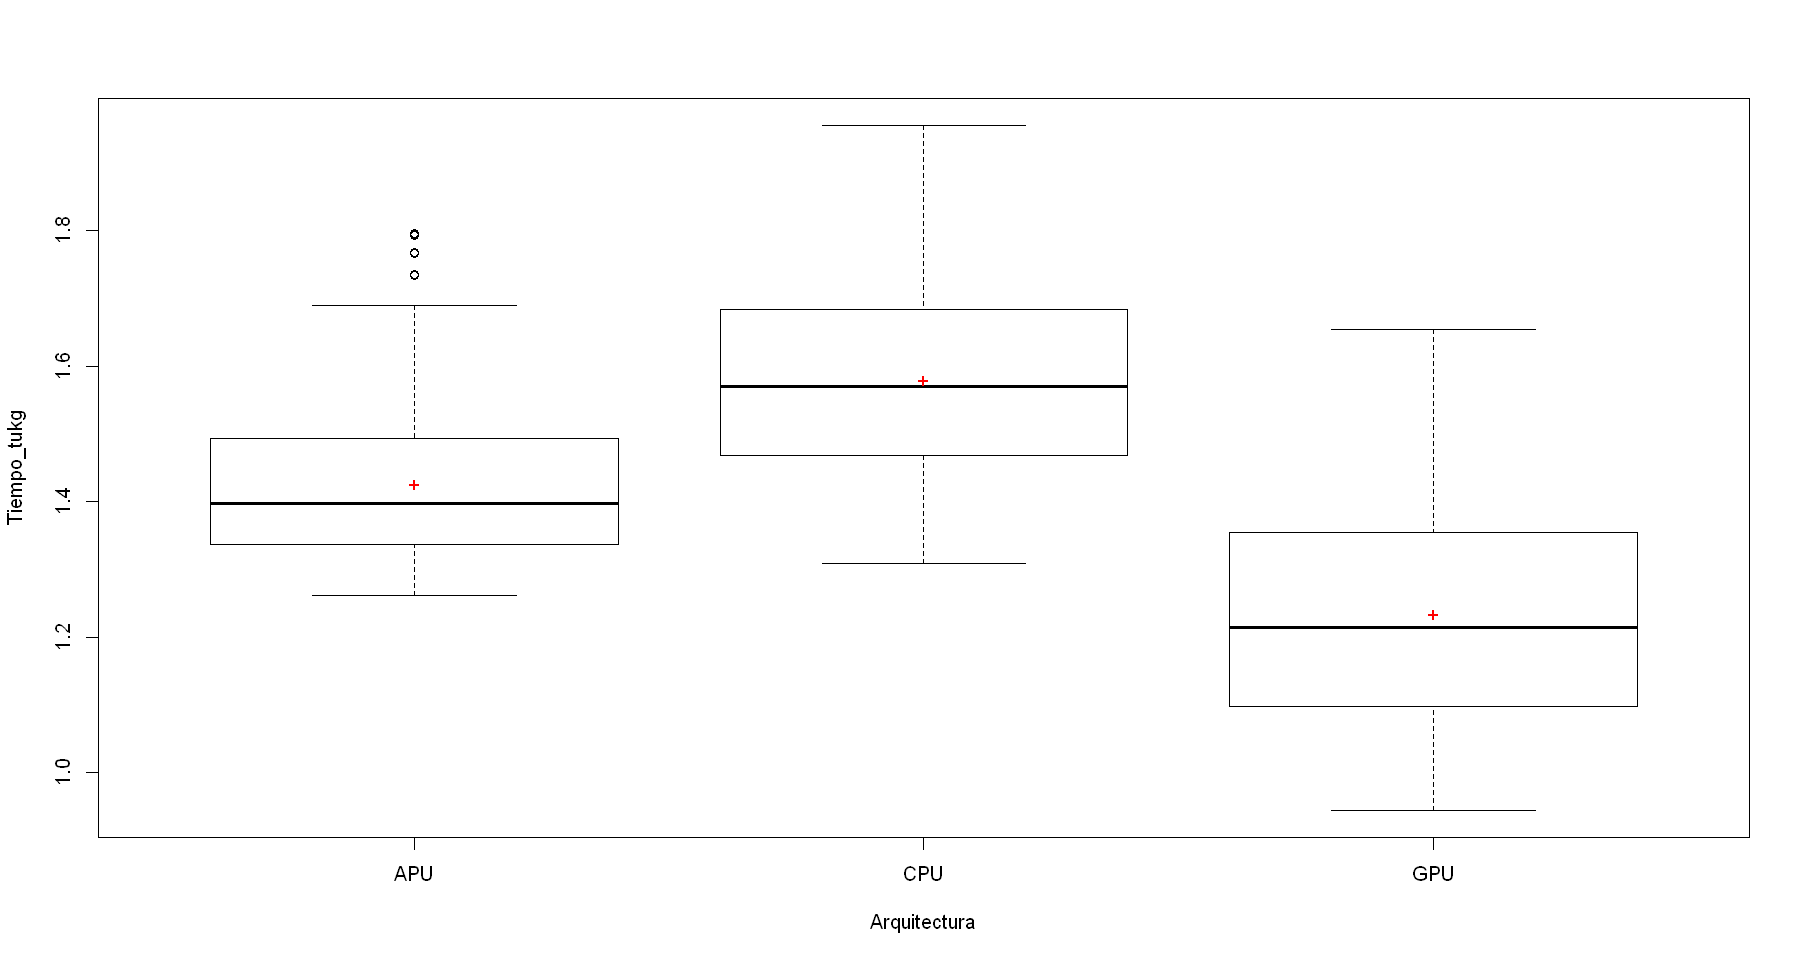

In [67]:
M = tapply(Tiempo_tukg, 
           INDEX= Data_proc$Arquitectura, 
           FUN = mean)
boxplot(Tiempo_tukg ~ Arquitectura, 
        data = Data_proc)
points(M, 
       col="red",
       pch="+", cex=1)

## 9. Métricas del desempeño de la arquitectura APU en comparación con las otras dos

In [102]:
## Objetos/Tiempo
Data_proc$Tiempo_Objetos <-  Data_proc$Obj_int/Data_proc$Tiempo
## Pixeles/Tiempo
Data_proc$Tiempo_Pixel <-  Data_proc$Pixeles/Data_proc$Tiempo
head(Data_proc)

,Objetos,Arquitectura,Efectos,Tamaño,Tiempo,Obj_int,Pixeles,Tiempo_Objetos,Tiempo_Pixel
,<fct>,<chr>,<chr>,<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,16000,APU,010,1280x720,50.25,16000,2764800,318.40796,55020.90
2,1000,APU,011,1440x900,30.90,1000,3888000,32.36246,125825.24
3,1000,APU,101,1280x720,46.22,1000,2764800,21.63566,59818.26
4,16000,APU,110,1440x900,171.67,16000,3888000,93.20207,22648.10
5,4000,APU,001,1280x720,33.40,4000,2764800,119.76048,82778.44
6,260000,APU,001,1280x720,147.53,260000,2764800,1762.35342,18740.60


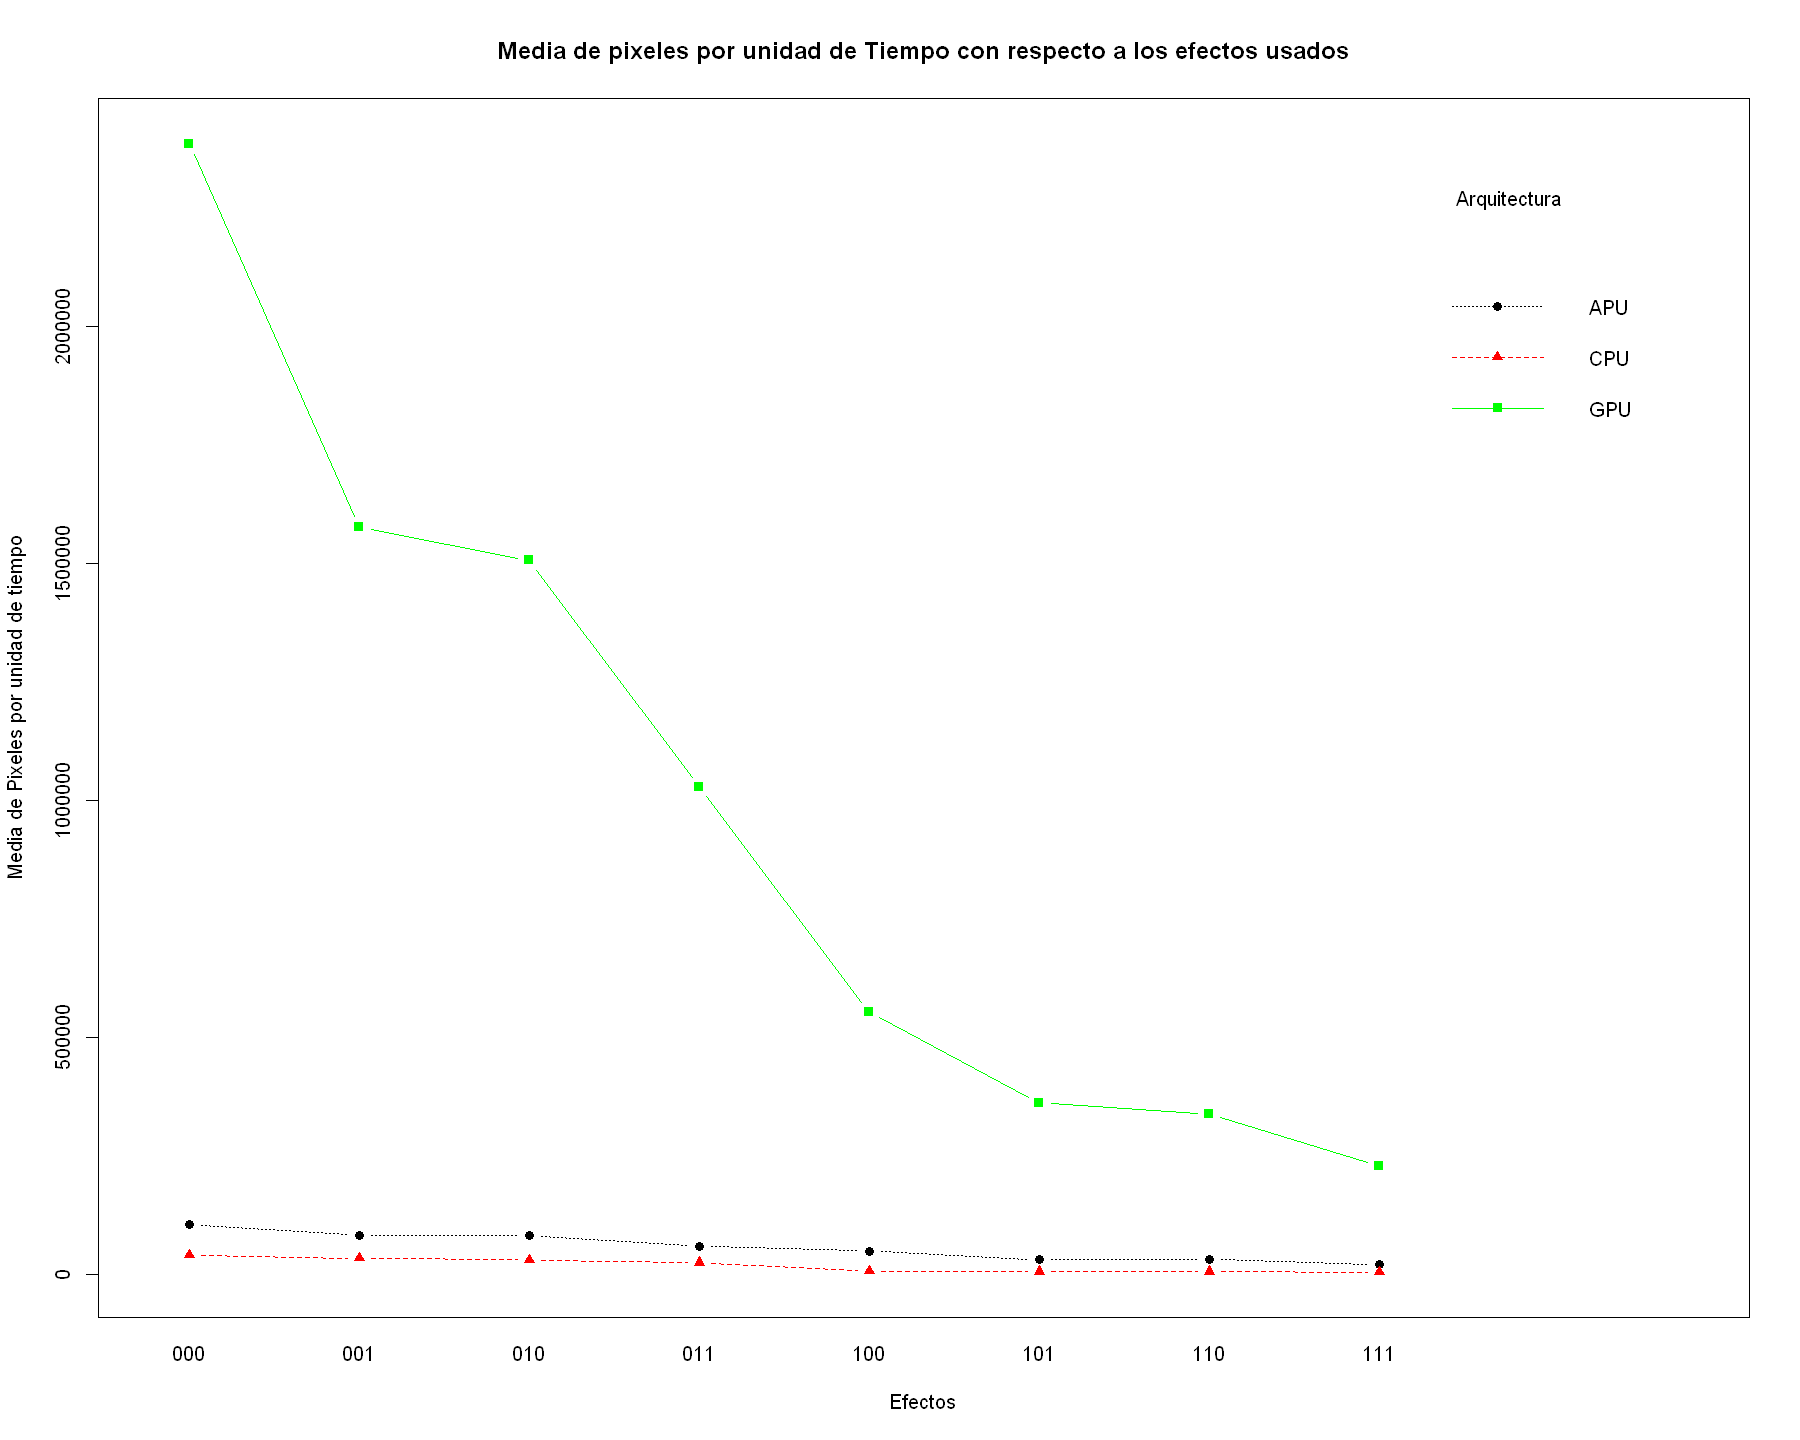

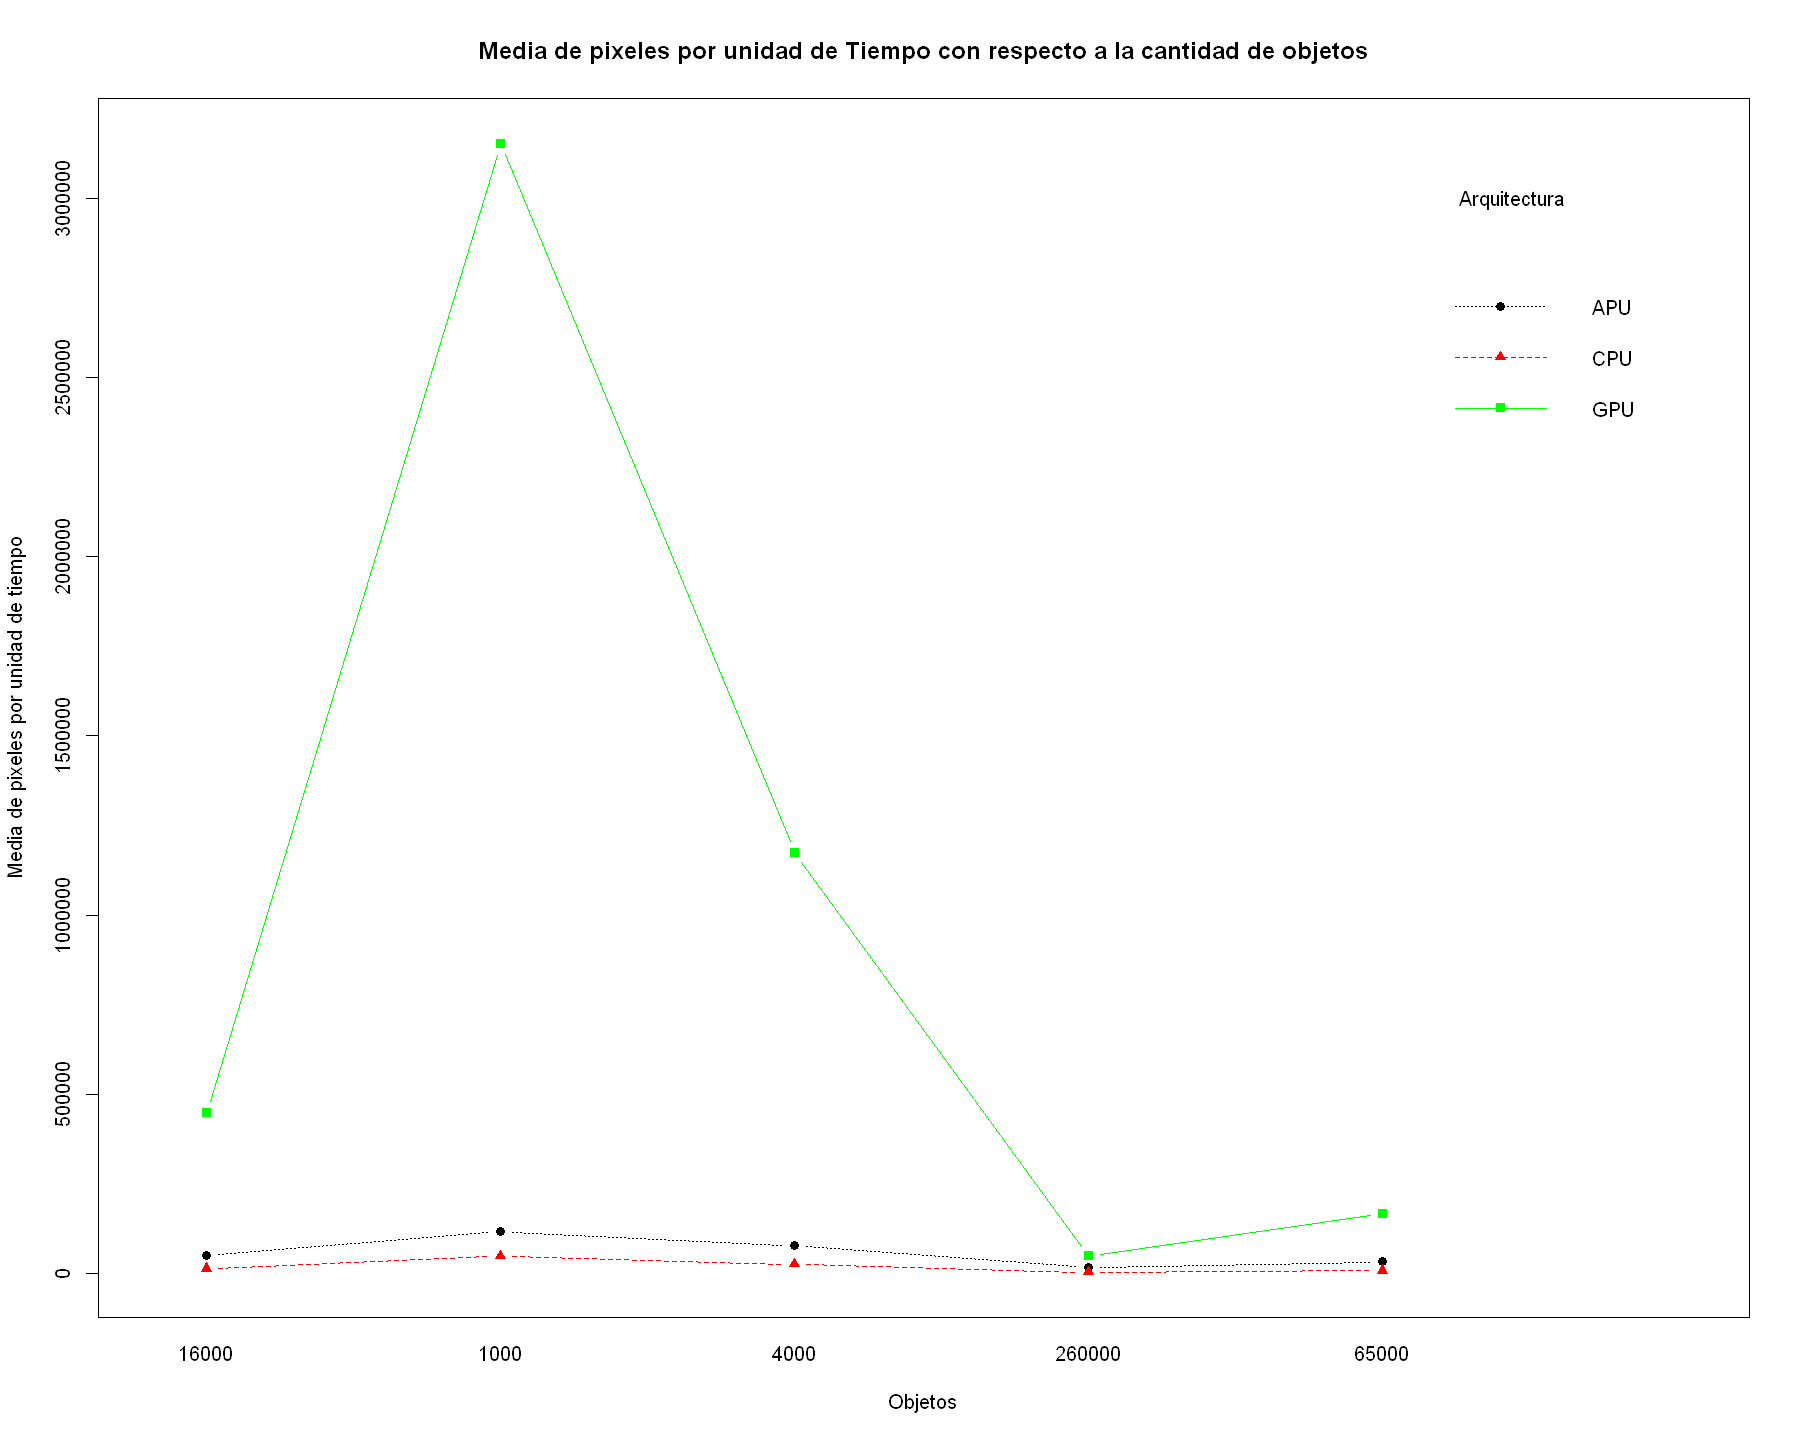

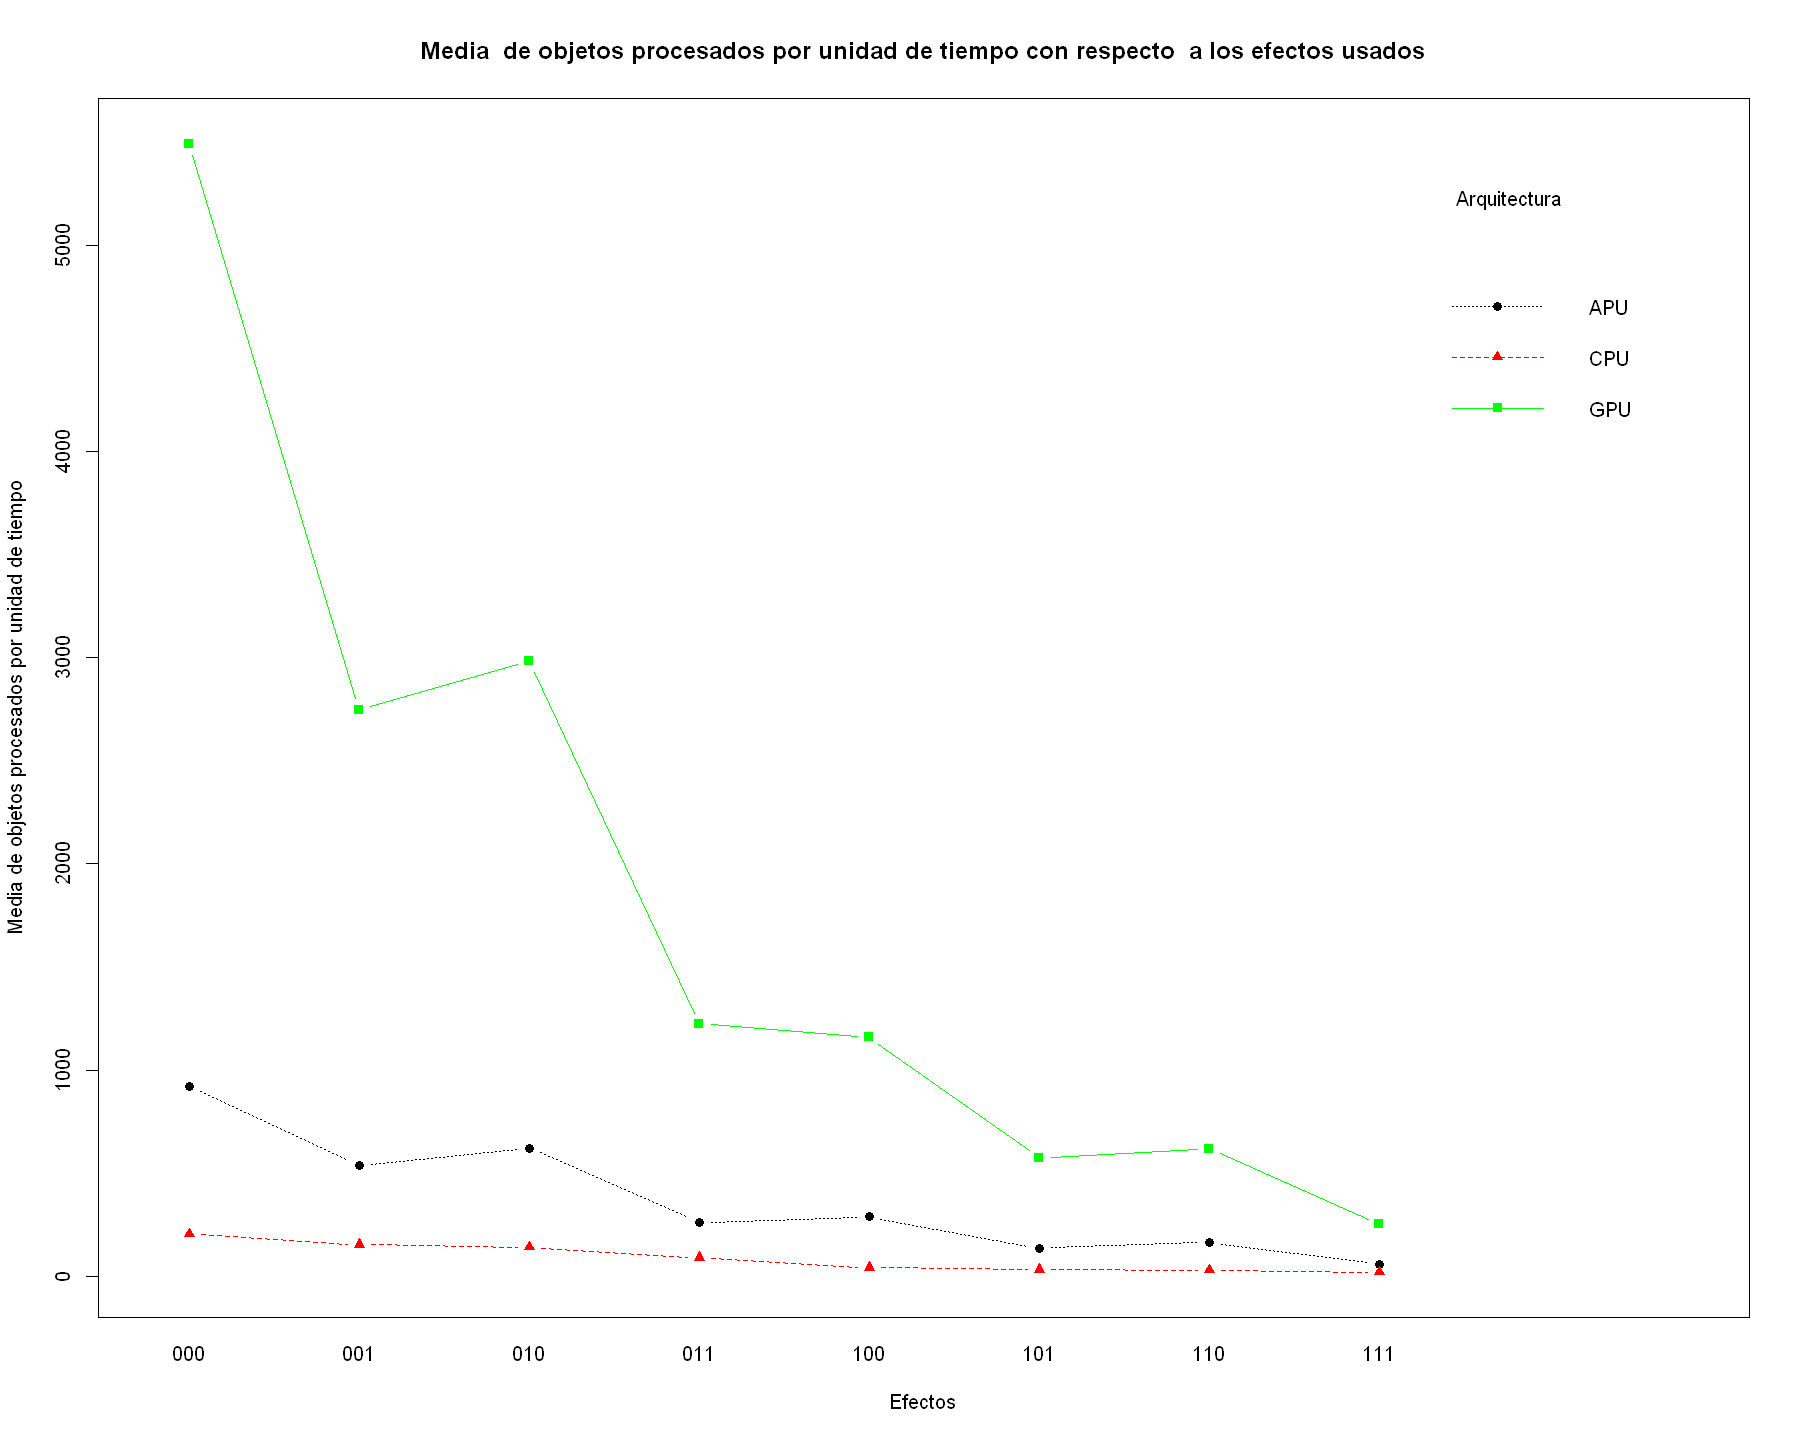

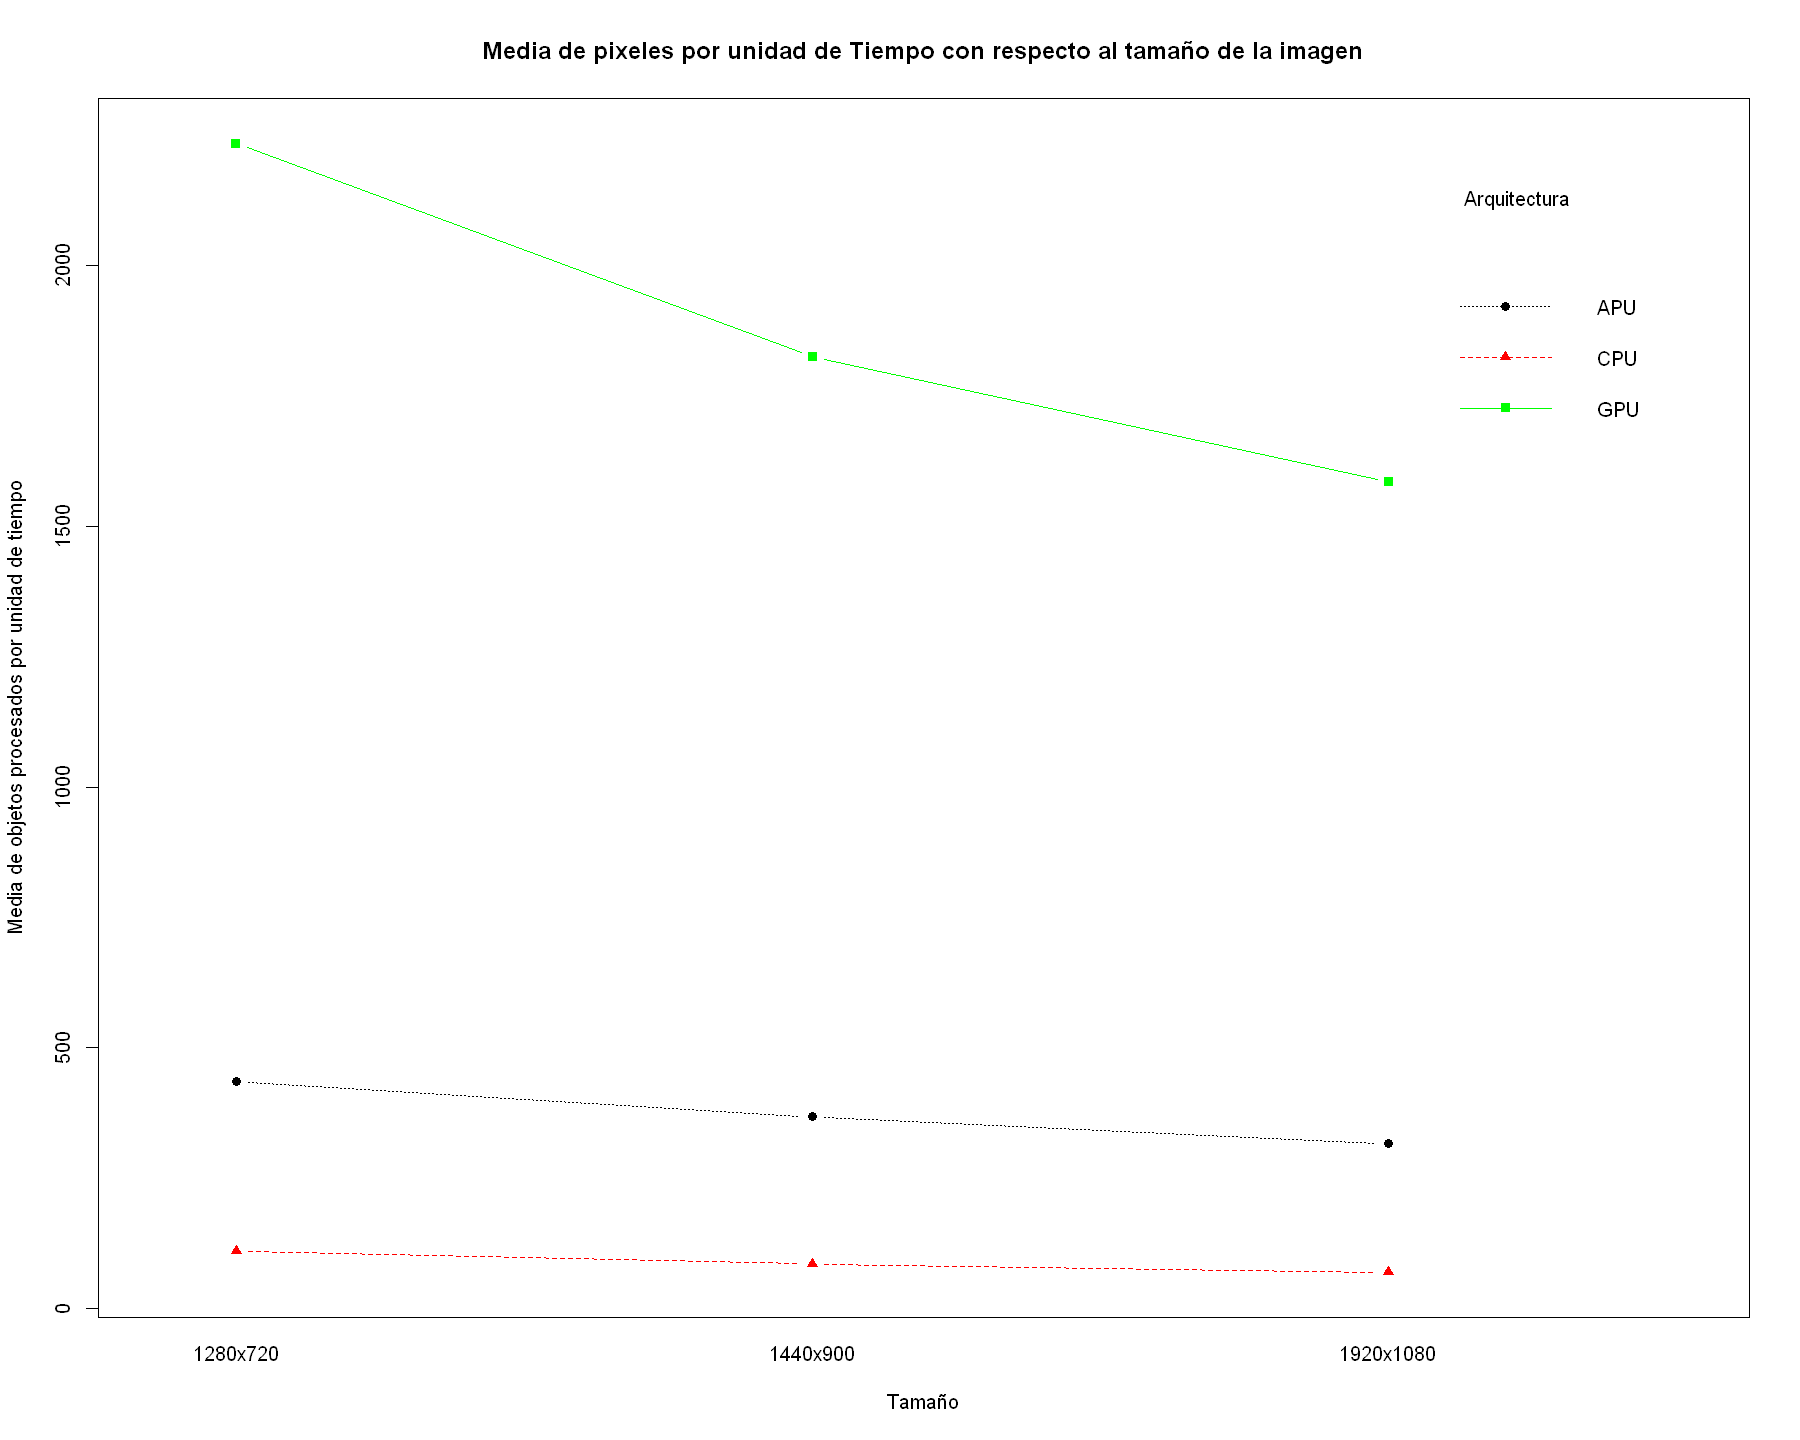

In [119]:
options(repr.plot.width=15, repr.plot.height=12)
par(mfrow=c(1,1))

interaction.plot(x.factor = Data_proc$Efectos,
                 trace.factor = Data_proc$Arquitectura,
                 response = Data_proc$Tiempo_Pixel,
                 fun = mean,
                 type = "b",
                 col = c("black", "red", "green"),
                 pch = c(19, 17, 15),
                 fixed = TRUE,
                 leg_bty = "o",
                trace.label = "Arquitectura",
                 xlab="Efectos",
                ylab="Media de Pixeles por unidad de tiempo",
               main="Media de pixeles por unidad de Tiempo con respecto a los efectos usados")
                 
interaction.plot(x.factor = Data_proc$Objetos,
                 trace.factor = Data_proc$Arquitectura,
                 response = Data_proc$Tiempo_Pixel,
                 fun = mean,
                 type = "b",
                 col = c("black", "red", "green"),
                 pch = c(19, 17, 15),
                 fixed = TRUE,
                 leg_bty = "o",
                trace.label = "Arquitectura",
                 xlab="Objetos",
                ylab="Media de pixeles por unidad de tiempo",
               main="Media de pixeles por unidad de Tiempo con respecto a la cantidad de objetos")

interaction.plot(x.factor = Data_proc$Efectos,
                 trace.factor = Data_proc$Arquitectura,
                 response = Data_proc$Tiempo_Objetos,
                 fun = mean,
                 type = "b",
                 col = c("black", "red", "green"),
                 pch = c(19, 17, 15),
                 fixed = TRUE,
                 leg_bty = "o",
                trace.label = "Arquitectura",
                 xlab="Efectos",
                ylab="Media de objetos procesados por unidad de tiempo",
               main="Media  de objetos procesados por unidad de tiempo con respecto  a los efectos usados")

interaction.plot(x.factor = Data_proc$Tamaño,
                 trace.factor = Data_proc$Arquitectura,
                 response = Data_proc$Tiempo_Objetos,
                 fun = mean,
                 type = "b",
                 col = c("black", "red", "green"),
                 pch = c(19, 17, 15),
                 fixed = TRUE,
                 leg_bty = "o",
                trace.label = "Arquitectura",
                 xlab="Tamaño",
                ylab="Media de objetos procesados por unidad de tiempo",
               main="Media de objetos por unidad de Tiempo con respecto al tamaño de la imagen")

